In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()


In [2]:
#  Données  XCustomerProduct
XCustomer = pd.read_csv('P5_01_4_XCustomersProducts.csv', sep = ',', low_memory=False )
print('forme des données XCustomer: ', XCustomer.shape)
XCustomer.head(10)

forme des données XCustomer:  (99201, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,4,29.99,8.72,SUD EST,Maison,1183,9,269.91
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,4,118.70,22.76,NORD EST,santé hygiène bébés et beauté,888,1,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,5,159.90,19.22,CENTRE OUEST,autres catégories,873,1,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,5,45.00,27.20,NORD EST,autres catégories,1136,1,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,5,19.90,8.72,SUD EST,autres catégories,1049,2,39.80
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,4,147.90,27.36,SUD,autres catégories,1268,1,147.90
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,2,49.90,16.05,SUD,none,1357,1,49.90
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-06-07 00:00:00,932afa1e708222e5821dac9cd5db4cae,5,59.99,15.17,SUD EST,autres catégories,1322,5,299.95
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-03-06 00:00:00,39382392765b6dc74812866ee5ee92a7,1,19.90,16.05,SUD,Maison,1435,3,59.70
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,5,149.99,19.77,SUD EST,Maison,1248,6,899.94


### Données 2018 par mois

In [3]:
XCustomer_201801 = XCustomer.query("order_purchase_timestamp >= '2018-01-1' and order_purchase_timestamp <='2018-01-31'")
XCustomer_201802 = XCustomer.query("order_purchase_timestamp >= '2018-02-1' and order_purchase_timestamp <='2018-02-28'")
XCustomer_201803 = XCustomer.query("order_purchase_timestamp >= '2018-03-1' and order_purchase_timestamp <='2018-03-31'")
XCustomer_201804 = XCustomer.query("order_purchase_timestamp >= '2018-04-1' and order_purchase_timestamp <='2018-04-30'")
XCustomer_201805 = XCustomer.query("order_purchase_timestamp >= '2018-05-1' and order_purchase_timestamp <='2018-05-31'")
XCustomer_201806 = XCustomer.query("order_purchase_timestamp >= '2018-06-1' and order_purchase_timestamp <='2018-06-30'")
XCustomer_201807 = XCustomer.query("order_purchase_timestamp >= '2018-07-1' and order_purchase_timestamp <='2018-07-31'")
XCustomer_201808 = XCustomer.query("order_purchase_timestamp >= '2018-08-1' and order_purchase_timestamp <='2018-08-31'")
XCustomer_201809 = XCustomer.query("order_purchase_timestamp >= '2018-09-1' and order_purchase_timestamp <='2018-09-30'")
XCustomer_201810 = XCustomer.query("order_purchase_timestamp >= '2018-10-1' and order_purchase_timestamp <='2018-10-31'")
XCustomer_201811 = XCustomer.query("order_purchase_timestamp >= '2018-11-1' and order_purchase_timestamp <='2018-11-30'")
XCustomer_201812 = XCustomer.query("order_purchase_timestamp >= '2018-12-1' and order_purchase_timestamp <='2018-12-31'")

In [4]:
XCustomer_201801

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
90,20e0101b20700188cadb288126949685,48558a50a7ba1aab61891936d2ca7681,delivered,2018-01-22 19:22:22,2018-02-19 00:00:00,42f80af2e6c585667e4eb416859ae153,5,89.18,16.38,SUD EST,Maison,1071,1,89.18
108,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-02-26 00:00:00,34c58672601f2c6d29db7efd1f6bf958,5,27.30,15.10,SUD EST,none,1066,1,27.30
119,01a75ac3dd000b7628a684be97c29234,57ee2ef64f17a5f9a4bf30489b06326c,delivered,2018-01-23 10:32:39,2018-02-21 00:00:00,91a7366b39d3620ce44f85fa5d116896,1,42.90,15.10,SUD EST,Maison,1070,1,42.90
121,ee0c5c649e17808bc4a363d3a80ebf85,cc3590e4afbb4b3e056b50a80a6a7d0c,delivered,2018-01-30 07:51:17,2018-02-21 00:00:00,2ed58d0567a2839599b85957ee02bca9,4,12.50,14.10,SUD EST,sports et loisirs,1063,4,50.00
146,9885fff91f7c807525f8320e5292a3db,83257fb6f3a1edd3a75464178aa3f382,delivered,2018-01-10 14:18:40,2018-01-31 00:00:00,82ab8d779ce526b08d6b92769be44c49,5,126.99,29.68,SUD EST,santé hygiène bébés et beauté,1083,1,126.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99085,e0cb1558bbe670b4cd84bf99bf93318f,956d144703c3b72fcb05e587e39f3ab2,delivered,2018-01-12 17:02:11,2018-02-20 00:00:00,14bfccea43b3abfbfb32eda0341149eb,5,234.90,18.89,SUD EST,autres catégories,1081,1,234.90
99114,87334ea6311529ce3e36b18350d2d4b3,02f29ee4753e69018942c30e71c04cfd,delivered,2018-01-20 18:39:14,2018-02-20 00:00:00,f86370dc13be4e8958cb036b628afbcc,5,29.50,19.84,SUD EST,autres catégories,1073,2,59.00
99132,2b9319f90cac6853394132c982ff27bf,835c64056c71ad9d093dc7166f22a8a8,delivered,2018-01-13 13:53:39,2018-02-19 00:00:00,ff2879fe71a6d417933aa4ecc6ea8754,5,148.90,23.91,SUD EST,Maison,1080,1,148.90
99145,dc9c5e38f7f39900731ed6c79a2c4849,c475bf34e5b24512f195b32035138841,delivered,2018-01-18 09:22:32,2018-02-22 00:00:00,a71bcab20a98fe0fc19e89cbecdf2f78,5,129.00,18.15,SUD,autres catégories,1075,2,258.00


In [5]:
XCustomer_201802

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,5,19.90,8.72,SUD EST,autres catégories,1049,2,39.80
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-03-12 00:00:00,a25d5f94840d3c6a1a49f271ed83f4ec,2,109.90,15.53,SUD EST,autres catégories,1042,3,329.70
29,ecab90c9933c58908d3d6add7c6f5ae3,761df82feda9778854c6dafdaeb567e4,delivered,2018-02-25 13:50:30,2018-04-13 00:00:00,1428917cd397d4f9ac0fde76dd6f2266,4,30.10,33.24,NORD,Outillage bricolage construction jardinage,1037,4,120.40
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-03-20 00:00:00,92fd8aa5948e20c43a014c44c025c5e1,5,78.00,28.95,NORD,Outillage bricolage construction jardinage,1045,2,156.00
36,60550084e6b4c0cb89a87df1f3e5ebd9,f5458ddc3545711efa883dd7ae7c4497,delivered,2018-02-21 18:15:12,2018-03-29 00:00:00,661a5e18a28b34880ccc60112f2b8e8e,4,39.90,26.89,NORD EST,smartphones et électroniques et informatique,1041,1,39.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98962,129c72226e320a7bf5b89efce442afd5,46dbd6b44084696774eb0bc59352069a,delivered,2018-02-12 03:09:04,2018-03-12 00:00:00,ae8482b27b2119e2c3278f5ddf9c1024,5,74.90,12.65,SUD EST,smartphones et électroniques et informatique,1050,1,74.90
99012,59af26972d088bedece0eddac136ccd5,8ff1c33a29a4649ea4e7c73b7d8a58f3,delivered,2018-02-27 18:02:00,2018-03-19 00:00:00,f9b3be78bbe16e73ad93e59f53e5569d,5,219.90,14.56,SUD EST,Outillage bricolage construction jardinage,1035,4,879.60
99123,91e29e944ec4772168d915912b251455,26c46b7d7e555c6ab71b788185ed8088,delivered,2018-02-24 19:43:39,2018-03-21 00:00:00,e4cd4f45801f11949b34052f70d5d7be,5,59.55,17.67,SUD EST,Maison,1038,49,2917.95
99152,e8455c3c0bc5471436a335a0de392761,3a4562b466aea32a6aa09fe85e67d400,delivered,2018-02-13 10:42:15,2018-03-09 00:00:00,2b87be21b33759b689e969cb8fcb9d0b,5,119.80,27.16,SUD,sports et loisirs,1049,2,239.60


In [6]:
XCustomer_201803

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
21,f848643eec1d69395095eb3840d2051e,4fa1cd166fa598be6de80fa84eaade43,delivered,2018-03-15 08:52:40,2018-03-29 00:00:00,68954feaafe4dd638f3bd3e2afa174ec,5,79.99,8.91,SUD EST,santé hygiène bébés et beauté,1019,3,239.97
27,dd78f560c270f1909639c11b925620ea,8b212b9525f9e74e85e37ed6df37693e,delivered,2018-03-12 01:50:26,2018-03-28 00:00:00,f4a7ef6bd931f83d75d83b71c94e90df,5,47.90,12.79,SUD EST,santé hygiène bébés et beauté,1022,1,47.90
39,7206b86ea789983f7a273ea7fa0bc2a8,3391c4bc11a817e7973e498b0b023158,delivered,2018-03-26 17:12:18,2018-04-12 00:00:00,1b542f810484d8c042aed33a7c61a218,3,36.90,12.79,SUD EST,Maison,1008,49,1808.10
134,b16cec67cb3f5a4bb31abe8988b43d19,62ffae18a7ca4b2e681c6296180ae346,delivered,2018-03-26 09:14:26,2018-04-20 00:00:00,81cfe11d1b667c768e77b6a9db5fe9b3,5,129.90,11.77,SUD EST,sports et loisirs,1008,3,389.70
174,93ec3e2c9a4beee38c28973d307093e1,330ca6b207006779da875ef48faef608,delivered,2018-03-29 14:27:41,2018-04-11 00:00:00,c3fcf3b664801fe10c4d9f62ac72b21a,1,179.90,24.55,SUD EST,Maison,1005,1,179.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99091,bdc11cf6acd11917b9ea3d91b95e1395,675292c8870ca23721c9c66a588dd982,delivered,2018-03-28 23:09:36,2018-04-25 00:00:00,94cffd1e5129cf8537e1d034e553c259,2,49.99,15.23,SUD EST,santé hygiène bébés et beauté,1006,3,149.97
99107,bfecb4ee6ab98bff69307aab578db48a,e6f5f771cdbc5d09c994f16c9af6523d,delivered,2018-03-17 12:52:37,2018-04-12 00:00:00,dca9a13536adcef18c6c5859487347b1,5,349.90,25.03,SUD EST,autres catégories,1017,2,699.80
99131,3020a6cfa8cb88da6e6860813b27167e,5ed5a4dacb093b32fa33cd369643f9a0,delivered,2018-03-10 10:43:58,2018-04-03 00:00:00,eccc94603d5b37c9ebdf41e75e7ab9b1,4,149.33,20.02,SUD EST,Maison,1024,1,149.33
99158,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-04-02 00:00:00,4b855cb19adce3763ce1af3acc2aae0b,1,249.90,19.63,SUD EST,santé hygiène bébés et beauté,1021,1,249.90


In [7]:
XCustomer_201804

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
31,1790eea0b567cf50911c057cf20f90f9,52142aa69d8d0e1247ab0cada0f76023,delivered,2018-04-16 21:15:39,2018-05-15 00:00:00,a6fefcd9f434474cf6fcd8ed1102fd63,1,186.90,38.00,NORD EST,Outillage bricolage construction jardinage,987,2,373.80
64,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-05-15 00:00:00,0e764fc1a13e47e900c3d59a989753e8,4,199.00,3.12,SUD EST,Mode et Vêtements,981,4,636.00
65,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-05-15 00:00:00,0e764fc1a13e47e900c3d59a989753e8,4,119.00,24.97,SUD EST,smartphones et électroniques et informatique,981,4,636.00
72,fa516182d28f96f5f5c651026b0749ee,55e6b290205c84ddd23ddf5eb134efd4,delivered,2018-04-13 08:44:17,2018-05-08 00:00:00,7f2eb9cf900070f2e7a7f0e95719f85b,5,190.00,19.41,SUD EST,Outillage bricolage construction jardinage,990,5,950.00
93,86f21bf63784876b9fd6d35f46581d72,332df68ccac2f2f7d9e11299188f8bce,delivered,2018-04-11 22:32:31,2018-05-21 00:00:00,bb7ef994cc22b1fc694ac59fb377b824,1,98.44,22.40,SUD EST,smartphones et électroniques et informatique,992,4,393.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99133,53ca14c357e60c77cd57aa96c8f0b4a5,f1cf46100438d0ef4e1916f2aef26718,delivered,2018-04-12 19:57:59,2018-05-21 00:00:00,63554d733e37ae21917372ed5635a0d4,4,120.00,44.61,SUD EST,Maison,991,1,120.00
99138,a6bd1f93b7ff72cc348ca07f38ec4bee,6d63fa86bd2f62908ad328325799152f,delivered,2018-04-20 17:28:40,2018-05-15 00:00:00,9108b540419f20edc605468f3966813b,5,59.90,17.33,SUD EST,Maison,983,1,59.90
99147,07fcf4ec8cadbea34c5b508e35e716c0,6ab5adc744d5c894470ce74466a78a27,delivered,2018-04-17 16:34:04,2018-05-10 00:00:00,40163091ee73ffaa57448cb8e21a2615,5,143.80,19.93,SUD EST,autres catégories,986,1,143.80
99148,709e863921cdc58bb0582cf305270d72,dbe4e04008988a0694a108eb7ee2e57c,delivered,2018-04-15 16:58:15,2018-05-03 00:00:00,50a5c821aebc6248b4529d9067de2e52,5,42.90,9.44,SUD EST,autres catégories,988,1,42.90


In [8]:
XCustomer_201805

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
47,25f4376934e13d3508486352e11a5db0,12fd2740039676063a874b9567dfa651,delivered,2018-05-17 16:59:11,2018-05-25 00:00:00,372e0fc66eacb8698e4f9997d366d961,5,69.90,12.43,SUD EST,Maison,956,2,139.80
89,9defaf92cff22420e4e8ef7784815a55,64fb950e760ec8b0db79154a1fa9c1bf,delivered,2018-05-11 13:10:51,2018-06-05 00:00:00,b11b7871c2b8be2d11fab954f58542f2,5,49.90,12.79,SUD EST,Mode et Vêtements,962,5,249.50
97,41bb5cee06dbf170878a9ef93ac7e7f5,1833a0540067becaf59368fe4cd4303a,delivered,2018-05-14 08:35:33,2018-06-08 00:00:00,ca73adc05ad5d0d880de79b5ea3253b3,5,10.90,12.79,SUD EST,Maison,959,10,109.00
141,9344ccd01ff5fa7ec2aef0ee7e1c49c3,4fd75fb5ef1f01c7585bf746092a1544,delivered,2018-05-16 16:10:21,2018-06-04 00:00:00,cc9cbe91f775a595bcb05af59019b396,5,39.00,12.79,SUD EST,autres catégories,957,2,78.00
149,90349f264a3d6a2525a34598d09dda6b,d19f254a07da73a055409256e9bfe40a,delivered,2018-05-11 16:35:19,2018-05-21 00:00:00,831a032a3327e2b8325faf9d37953870,5,45.00,7.39,SUD EST,Outillage bricolage construction jardinage,962,72,3240.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99118,2ff4dba9b7e65ee15034ed2b0004048d,f3721694bcec86501e4a19cf459d3b28,delivered,2018-05-23 18:35:24,2018-06-28 00:00:00,b845ca585648feec8dccd229c0ce48ee,5,980.00,33.59,SUD EST,Outillage bricolage construction jardinage,950,1,980.00
99121,5bd233924f0b9c52492bd5a92e5ab2d3,d7475a536385854da614094f0bf12275,delivered,2018-05-30 13:23:37,2018-07-13 00:00:00,17e3c70fc02567ec2d3831fa78e037c0,5,99.99,38.75,NORD,sports et loisirs,943,1,99.99
99122,c7510fe2bce3ab54854dc588ce4d187c,f74562da630b57572d1742ba2f28b662,delivered,2018-05-16 09:05:27,2018-06-21 00:00:00,5112d7286a328a07d06a8051c3c55410,5,199.00,21.12,SUD EST,autres catégories,957,2,398.00
99182,dfc6eb45a2753ed9e6c6ef4987b44503,a046c690e0564ffde0ce611b5eee2c30,delivered,2018-05-25 17:05:17,2018-06-26 00:00:00,4a7ce65ce092885c0af12dc0001457cf,5,150.00,23.63,SUD EST,Outillage bricolage construction jardinage,948,1,150.00


In [9]:
XCustomer_201806

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
51,47aa4816b27ba60ec948cd019cc1afc1,148348ff65384b4249b762579532e248,delivered,2018-06-26 13:42:52,2018-07-20 00:00:00,db979bdfe0bbba29ecd3df3f6c50bea2,5,53.44,18.47,SUD,Outillage bricolage construction jardinage,916,2,106.88
55,40c5e18f7d112b59b3e5113a59a905b3,67407057a7d5ee17d1cd09523f484d13,delivered,2018-06-11 10:25:52,2018-07-16 00:00:00,7cfba6e55439cae3fd2479d62fafe67f,5,119.90,8.78,SUD EST,santé hygiène bébés et beauté,931,2,239.80
56,734e7d1bbaeb2ff82521ca0fe6fb6f79,2932d241d1f31e6df6c701d52370ae02,delivered,2018-06-11 08:18:19,2018-07-05 00:00:00,f7603d34c795584792a484186233e6e5,5,29.99,13.47,SUD EST,Outillage bricolage construction jardinage,931,4,119.96
68,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,delivered,2018-06-18 16:02:23,2018-07-13 00:00:00,a464f750556546a0989d9326ec003ccf,5,84.90,13.25,SUD EST,autres catégories,924,32,2716.80
69,b52cc4919de82b4d696a4380d10804a3,be8c14c16a4d47194ccdfe10f1fc5b1a,delivered,2018-06-13 13:47:39,2018-06-26 00:00:00,c86a25b8f5f6c203bb3471553bdc3200,5,42.99,12.03,SUD EST,Outillage bricolage construction jardinage,929,4,171.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99125,e21cac6666f9fd6bffe900a1d7cdaf11,374b19230eddec2a862b8a89489d4e5c,delivered,2018-06-10 19:40:23,2018-07-05 00:00:00,8db85544764fe786ae7e91c2401ce9c1,5,108.90,18.34,SUD,autres catégories,932,1,108.90
99139,ecb8849b9673c0bc2a510456938b508b,e405219e7366a91eb22f74d3926415d6,delivered,2018-06-27 13:28:51,2018-07-18 00:00:00,2ba34389582f8a27e6e9bdde979cb2ef,4,24.98,12.84,SUD EST,Maison,915,1,24.98
99159,6f756900677a981dd764c34ad85c4b4c,7499160b672798870b8d4469ec2e78a4,delivered,2018-06-26 21:40:46,2018-07-25 00:00:00,2d8c8c15a3e5119692a3820039ac8761,5,124.90,17.06,SUD EST,sports et loisirs,916,1,124.90
99166,27b6badcdaa36a93808ac126acc05329,dfbad75de7638cec2c9482cac4a10828,delivered,2018-06-27 09:56:34,2018-07-12 00:00:00,7fbbcdacab871435c9318d8b913b4548,5,27.90,7.94,SUD EST,autres catégories,915,5,139.50


In [10]:
XCustomer_201807

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,4,118.70,22.76,NORD EST,santé hygiène bébés et beauté,888,1,118.70
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-08-08 00:00:00,e2dfa3127fedbbca9707b36304996dab,5,19.90,12.80,SUD EST,Maison,887,49,975.10
34,b276e4f8c0fb86bd82fce576f21713e0,cf8ffeddf027932e51e4eae73b384059,delivered,2018-07-29 23:34:51,2018-08-06 00:00:00,6cbe8a392b76916e84c2faf69d0d0da0,5,179.00,9.41,SUD EST,santé hygiène bébés et beauté,883,3,537.00
48,5820a1100976432c7968a52da59e9364,2b56e94c2f66f2d97cfa63356f69cee8,delivered,2018-07-29 11:24:17,2018-08-13 00:00:00,cc1a30280651daf2d918ed7868575771,5,33.90,18.34,SUD,sports et loisirs,883,4,135.60
52,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,2018-08-16 00:00:00,c77154776ead8e798c2d684205938f71,1,60.00,15.52,SUD,sports et loisirs,886,4,240.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99100,5dea57306e01caa42ad0b07b85042953,0b3a3c105d2d5b981fcf34c111fb18a4,delivered,2018-07-16 01:31:13,2018-08-14 00:00:00,0fbf5878a4372885f8eb1c827b348734,5,155.97,19.19,SUD,autres catégories,896,1,155.97
99110,ffe0d6b7d4772a7380978ef7f0885b89,2cf6a6d8a9ee70f8692a9afb7ad22340,delivered,2018-07-24 21:58:04,2018-08-01 00:00:00,4b26e5e3f32448770d5361c93e5bd54b,5,70.00,13.32,SUD,Maison,888,2,140.00
99128,906aea7f9a8bbd2b625400e22531469e,aadfed7c87a6ab33caa12d5aaa413aaa,delivered,2018-07-21 01:01:06,2018-08-06 00:00:00,f6339afaeb5b5530e3500c5158f68422,5,40.99,14.60,SUD EST,Maison,891,2,81.98
99143,5515bb89b509d97aa78d434bc96ecee3,47a7e021c968ec3abacc05c3dc44cfdd,delivered,2018-07-14 20:17:16,2018-08-08 00:00:00,f359e6e1120bad1d7cccc6213c2e9601,5,31.50,22.15,NORD EST,santé hygiène bébés et beauté,898,1,31.50


In [11]:
XCustomer_201808

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value
79,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-30 00:00:00,a71cac9f356cfeb9db35061020806212,4,93.00,7.91,SUD EST,autres catégories,855,8,744.00
101,e3447938231fb6ba2fee0231b51eca59,2c3642e1392097fb4af76a76fec16a46,delivered,2018-08-26 11:04:26,2018-08-30 00:00:00,08de4d9507128e2ad419e26cc4f22b65,5,160.00,12.14,SUD EST,Maison,855,2,320.00
113,80d817467dc3d0a4bb5ab8986c962b1f,a4a2abd07b1cdd4902cf245cdfa1451d,delivered,2018-08-22 16:10:29,2018-09-05 00:00:00,337bf0efbf9e5ba67461d2e5b4e5c2b1,5,49.90,16.54,CENTRE OUEST,autres catégories,859,4,199.60
120,0c6b011f8a4f87010c23995f5807d152,a78b75a2ad06180de06b82857ca442b3,delivered,2018-08-20 18:24:30,2018-09-13 00:00:00,198fa73f9282fb46d9b5b5c25394b7e1,5,43.00,23.02,NORD EST,autres catégories,861,2,86.00
218,615ae1b88a25a4ac47fbf55c9c847b6e,25daddfce277eafad87c4d28d71d8229,delivered,2018-08-10 13:42:06,2018-08-30 00:00:00,677e8fb8d35d03be1fd8fd461c60a1cf,1,64.99,19.65,SUD,Maison,871,3,194.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99105,32fb0d2fce3a6ea27205e44ec665e91d,bede1cbee8f403af59778ab6cbac2a21,delivered,2018-08-13 06:49:00,2018-08-30 00:00:00,a98d7b02cd57b82853e06125a7c8043d,5,59.00,13.07,SUD EST,autres catégories,868,1,59.00
99130,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,2018-09-03 00:00:00,7a22d14aa3c3599238509ddca4b93b01,1,63.90,9.20,SUD EST,autres catégories,852,1,63.90
99144,da95823b29f9ce7bcc4deebe1e568aff,47610d89c6fdfac969beb4fa9f5d37f1,delivered,2018-08-19 11:48:49,2018-08-29 00:00:00,2ed0ea186de34fab740cdb294d78701e,5,134.90,9.69,SUD EST,santé hygiène bébés et beauté,862,1,134.90
99156,5597332b7eded552f104108f22b023e4,aaa423fb52f4106f477683490cbd5845,delivered,2018-08-15 13:03:37,2018-08-21 00:00:00,8a898880a61e551c80bacadfb4356255,5,27.49,8.97,SUD EST,Maison,866,1,27.49


In [12]:
XCustomer_201809

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value


In [13]:
XCustomer_201810

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value


In [14]:
XCustomer_201811

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value


In [15]:
XCustomer_201812

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_unique_id_x,review_score,price_x,freight_value_x,Regions,types_produits,recency,frequency,monetary_value


In [16]:
# Suppression des colonnes innutiles
for c in XCustomer_201801.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201801[c]
        
for c in XCustomer_201802.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201802[c]
        
for c in XCustomer_201803.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201803[c]
        
for c in XCustomer_201804.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201804[c]
        
for c in XCustomer_201805.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201805[c]
        
for c in XCustomer_201806.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201806[c]       
        
for c in XCustomer_201807.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201807[c]
        
for c in XCustomer_201808.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201808[c]
        
for c in XCustomer_201809.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201809[c]
        
for c in XCustomer_201810.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201810[c]
        
for c in XCustomer_201811.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201811[c]
        
for c in XCustomer_201812.columns:
    if c not in ['Regions','types_produits','review_score',\
                 'recency','frequency','monetary_value']:
        del XCustomer_201812[c]                        

In [17]:
# one-hot encoding of categorical variables
XCustomer_201801 = pd.get_dummies(XCustomer_201801)
# one-hot encoding of categorical variables
XCustomer_201802 = pd.get_dummies(XCustomer_201802)
# one-hot encoding of categorical variables
XCustomer_201803 = pd.get_dummies(XCustomer_201803)
# one-hot encoding of categorical variables
XCustomer_201804 = pd.get_dummies(XCustomer_201804)
# one-hot encoding of categorical variables
XCustomer_201805 = pd.get_dummies(XCustomer_201805)
# one-hot encoding of categorical variables
XCustomer_201806 = pd.get_dummies(XCustomer_201806)
# one-hot encoding of categorical variables
XCustomer_201807 = pd.get_dummies(XCustomer_201807)
# one-hot encoding of categorical variables
XCustomer_201808 = pd.get_dummies(XCustomer_201808)
# one-hot encoding of categorical variables
XCustomer_201809 = pd.get_dummies(XCustomer_201809)
# one-hot encoding of categorical variables
XCustomer_201810 = pd.get_dummies(XCustomer_201810)
# one-hot encoding of categorical variables
XCustomer_201811 = pd.get_dummies(XCustomer_201811)
# one-hot encoding of categorical variables
XCustomer_201812 = pd.get_dummies(XCustomer_201812)

print('XCustomer_201801 Features shape: ', XCustomer_201801.shape)

print('XCustomer_201802 Features shape: ', XCustomer_201802.shape)

print('XCustomer_201803 Features shape: ', XCustomer_201803.shape)

print('XCustomer_201804 Features shape: ', XCustomer_201804.shape)

print('XCustomer_201805 Features shape: ', XCustomer_201805.shape)

print('XCustomer_201806 Features shape: ', XCustomer_201806.shape)

print('XCustomer_201807 Features shape: ', XCustomer_201807.shape)

print('XCustomer_201808 Features shape: ', XCustomer_201808.shape)

print('XCustomer_201809 Features shape: ', XCustomer_201809.shape)

print('XCustomer_201810 Features shape: ', XCustomer_201810.shape)

print('XCustomer_201811 Features shape: ', XCustomer_201811.shape)

print('XCustomer_201812 Features shape: ', XCustomer_201812.shape)


XCustomer_201801 Features shape:  (5069, 19)
XCustomer_201802 Features shape:  (4331, 19)
XCustomer_201803 Features shape:  (4836, 19)
XCustomer_201804 Features shape:  (4682, 19)
XCustomer_201805 Features shape:  (4189, 19)
XCustomer_201806 Features shape:  (4305, 19)
XCustomer_201807 Features shape:  (4480, 19)
XCustomer_201808 Features shape:  (3694, 19)
XCustomer_201809 Features shape:  (0, 4)
XCustomer_201810 Features shape:  (0, 4)
XCustomer_201811 Features shape:  (0, 4)
XCustomer_201812 Features shape:  (0, 4)


In [18]:
# Suppression des colonnes innutiles
for c in XCustomer_201801.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_201801[c]

# Suppression des colonnes innutiles
for c in XCustomer_201802.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_201802[c] 
        
# Suppression des colonnes innutiles
for c in XCustomer_201803.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_201803[c]        

# Suppression des colonnes innutiles
for c in XCustomer_201804.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_201804[c]

# Suppression des colonnes innutiles
for c in XCustomer_201805.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_201805[c] 
        
# Suppression des colonnes innutiles
for c in XCustomer_201806.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_201806[c]        
        
# Suppression des colonnes innutiles
for c in XCustomer_201807.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_201807[c]

# Suppression des colonnes innutiles
for c in XCustomer_201808.columns:
    if c not in ['Regions_CENTRE OUEST','Regions_NORD','Regions_NORD EST',\
                 'Regions_SUD','Regions_SUD EST','types_produits_Maison','review_score',\
                 'types_produits_Mode et Vêtements','types_produits_Outillage bricolage construction jardinage',\
                 'types_produits_alimentation et boissons','types_produits_autres catégories',\
                 'types_produits_santé hygiène bébés et beauté','types_produits_smartphones et électroniques et informatique',\
                 'types_produits_sports et loisirs','recency','frequency','monetary_value']:
        del XCustomer_201808[c] 
        
   
        

In [19]:
XCustomer_201801['monetary_value'] = XCustomer_201801['monetary_value'] + 0.0000000001
XCustomer_201802['monetary_value'] = XCustomer_201802['monetary_value'] + 0.0000000001
XCustomer_201803['monetary_value'] = XCustomer_201803['monetary_value'] + 0.0000000001
XCustomer_201804['monetary_value'] = XCustomer_201804['monetary_value'] + 0.0000000001
XCustomer_201805['monetary_value'] = XCustomer_201805['monetary_value'] + 0.0000000001
XCustomer_201806['monetary_value'] = XCustomer_201806['monetary_value'] + 0.0000000001
XCustomer_201807['monetary_value'] = XCustomer_201807['monetary_value'] + 0.0000000001
XCustomer_201808['monetary_value'] = XCustomer_201808['monetary_value'] + 0.0000000001


XCustomer_201801_trans = XCustomer_201801
XCustomer_201802_trans = XCustomer_201802
XCustomer_201803_trans = XCustomer_201803
XCustomer_201804_trans = XCustomer_201804
XCustomer_201805_trans = XCustomer_201805
XCustomer_201806_trans = XCustomer_201806
XCustomer_201807_trans = XCustomer_201807
XCustomer_201808_trans = XCustomer_201808


#Apply Log Transformation
XCustomer_201801_trans['recency'] = np.log(XCustomer_201801['recency'])
XCustomer_201801_trans['frequency'] = np.log(XCustomer_201801['frequency'])
XCustomer_201801_trans['monetary_value'] = np.log(XCustomer_201801['monetary_value'])

#Apply Log Transformation
XCustomer_201802_trans['recency'] = np.log(XCustomer_201802['recency'])
XCustomer_201802_trans['frequency'] = np.log(XCustomer_201802['frequency'])
XCustomer_201802_trans['monetary_value'] = np.log(XCustomer_201802['monetary_value'])

#Apply Log Transformation
XCustomer_201803_trans['recency'] = np.log(XCustomer_201803['recency'])
XCustomer_201803_trans['frequency'] = np.log(XCustomer_201803['frequency'])
XCustomer_201803_trans['monetary_value'] = np.log(XCustomer_201803['monetary_value'])

#Apply Log Transformation
XCustomer_201804_trans['recency'] = np.log(XCustomer_201804['recency'])
XCustomer_201804_trans['frequency'] = np.log(XCustomer_201804['frequency'])
XCustomer_201804_trans['monetary_value'] = np.log(XCustomer_201804['monetary_value'])

#Apply Log Transformation
XCustomer_201805_trans['recency'] = np.log(XCustomer_201805['recency'])
XCustomer_201805_trans['frequency'] = np.log(XCustomer_201805['frequency'])
XCustomer_201805_trans['monetary_value'] = np.log(XCustomer_201805['monetary_value'])

#Apply Log Transformation
XCustomer_201806_trans['recency'] = np.log(XCustomer_201806['recency'])
XCustomer_201806_trans['frequency'] = np.log(XCustomer_201806['frequency'])
XCustomer_201806_trans['monetary_value'] = np.log(XCustomer_201806['monetary_value'])

#Apply Log Transformation
XCustomer_201807_trans['recency'] = np.log(XCustomer_201807['recency'])
XCustomer_201807_trans['frequency'] = np.log(XCustomer_201807['frequency'])
XCustomer_201807_trans['monetary_value'] = np.log(XCustomer_201807['monetary_value'])

#Apply Log Transformation
XCustomer_201808_trans['recency'] = np.log(XCustomer_201808['recency'])
XCustomer_201808_trans['frequency'] = np.log(XCustomer_201808['frequency'])
XCustomer_201808_trans['monetary_value'] = np.log(XCustomer_201808['monetary_value'])



In [20]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


std_scale_201801 = MinMaxScaler().fit(XCustomer_201801_trans)
X_scaled_201801 = std_scale_201801.transform(XCustomer_201801_trans)

reduced_data_201801 = PCA(n_components=2).fit_transform(X_scaled_201801)

std_scale_201802 = MinMaxScaler().fit(XCustomer_201802_trans)
X_scaled_201802 = std_scale_201802.transform(XCustomer_201802_trans)

reduced_data_201802 = PCA(n_components=2).fit_transform(X_scaled_201802)

std_scale_201803 = MinMaxScaler().fit(XCustomer_201803_trans)
X_scaled_201803 = std_scale_201803.transform(XCustomer_201803_trans)

reduced_data_201803 = PCA(n_components=2).fit_transform(X_scaled_201803)

std_scale_201804 = MinMaxScaler().fit(XCustomer_201804_trans)
X_scaled_201804 = std_scale_201804.transform(XCustomer_201804_trans)

reduced_data_201804 = PCA(n_components=2).fit_transform(X_scaled_201804)

std_scale_201805 = MinMaxScaler().fit(XCustomer_201805_trans)
X_scaled_201805 = std_scale_201805.transform(XCustomer_201805_trans)

reduced_data_201805 = PCA(n_components=2).fit_transform(X_scaled_201805)

std_scale_201806 = MinMaxScaler().fit(XCustomer_201806_trans)
X_scaled_201806 = std_scale_201806.transform(XCustomer_201806_trans)

reduced_data_201806 = PCA(n_components=2).fit_transform(X_scaled_201806)

std_scale_201807 = MinMaxScaler().fit(XCustomer_201807_trans)
X_scaled_201807 = std_scale_201807.transform(XCustomer_201807_trans)

reduced_data_201807 = PCA(n_components=2).fit_transform(X_scaled_201807)

std_scale_201808 = MinMaxScaler().fit(XCustomer_201808_trans)
X_scaled_201808 = std_scale_201808.transform(XCustomer_201808_trans)

reduced_data_201808 = PCA(n_components=2).fit_transform(X_scaled_201808)



# MODEL KMeans

## Année 2018

## Janvier

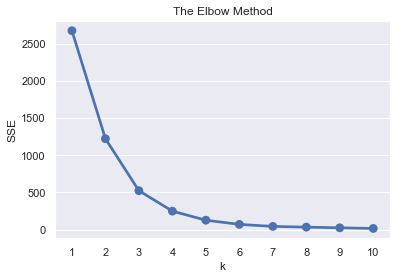

In [21]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_201801)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [22]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_201801)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201801_k3 = XCustomer_201801.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201801_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


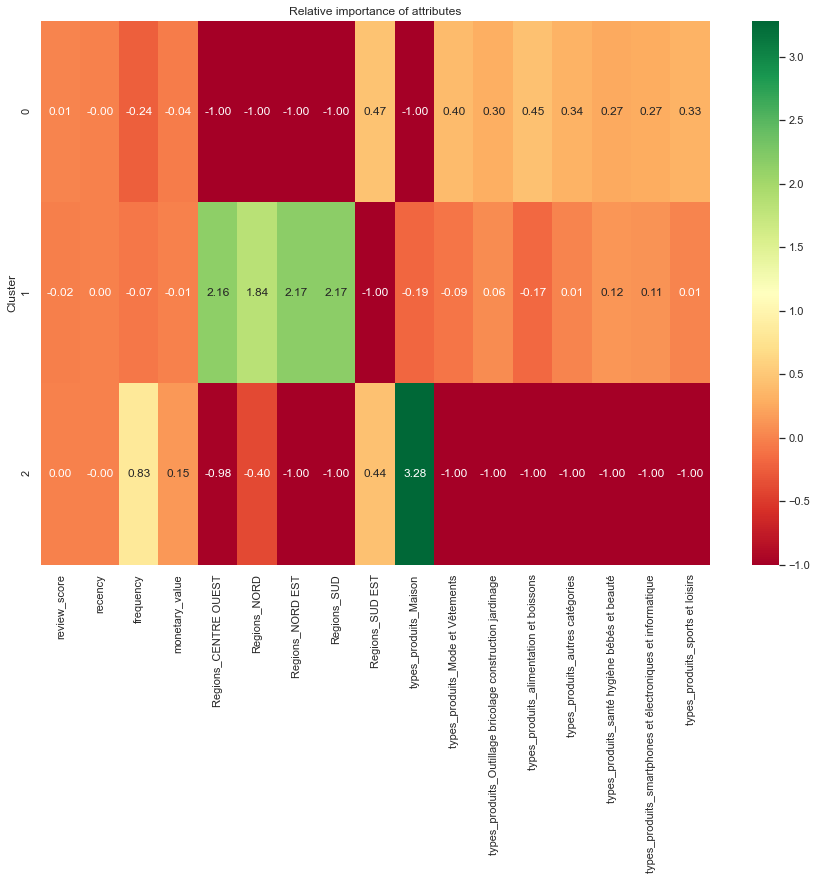

In [23]:
# Calculate average data values for each cluster
cluster_avg = data_process_201801_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201801.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


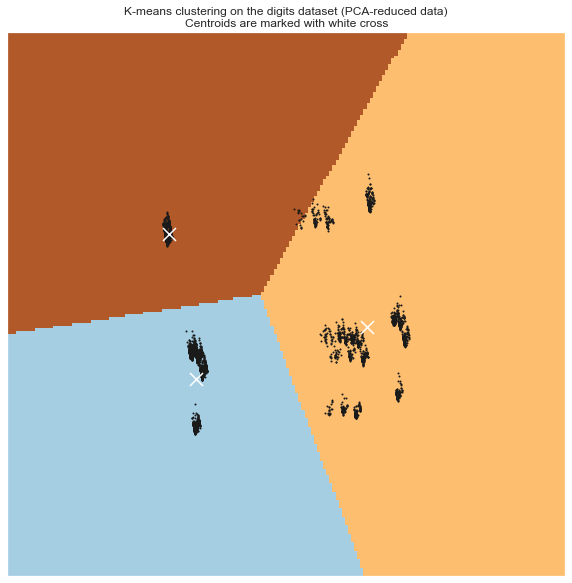

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201801)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201801[:, 0].min() - 1, reduced_data_201801[:, 0].max() + 1
y_min, y_max = reduced_data_201801[:, 1].min() - 1, reduced_data_201801[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201801[:, 0], reduced_data_201801[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [25]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_201801)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201801_k4 = XCustomer_201801.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201801_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,2.0,6.0,0.0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


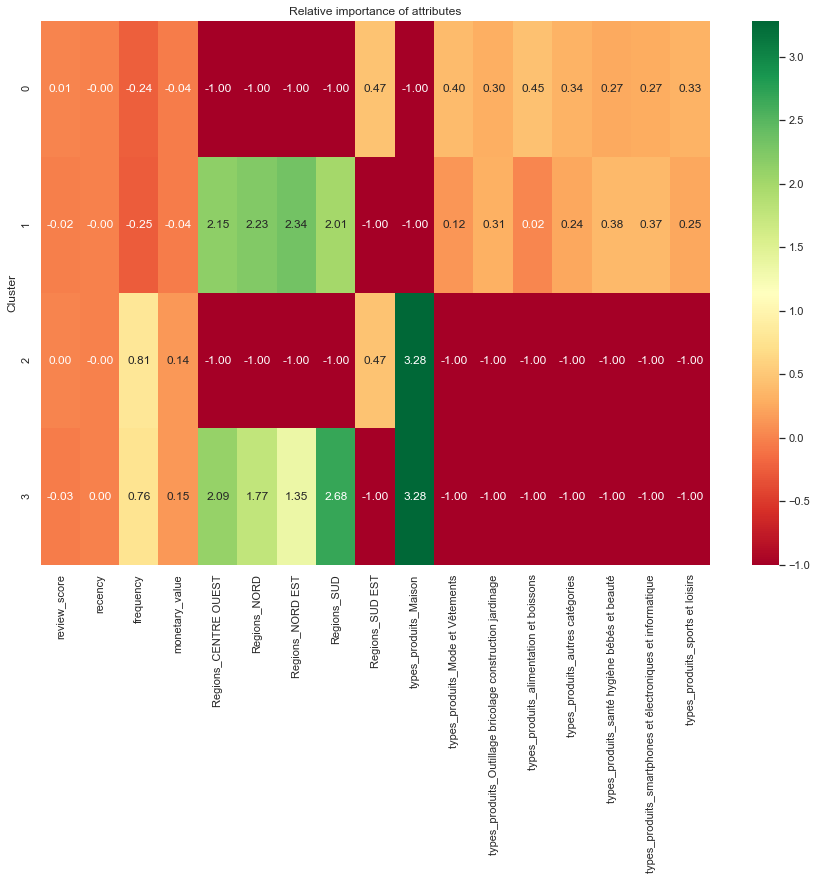

In [26]:
# Calculate average data values for each cluster
cluster_avg = data_process_201801_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201801.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


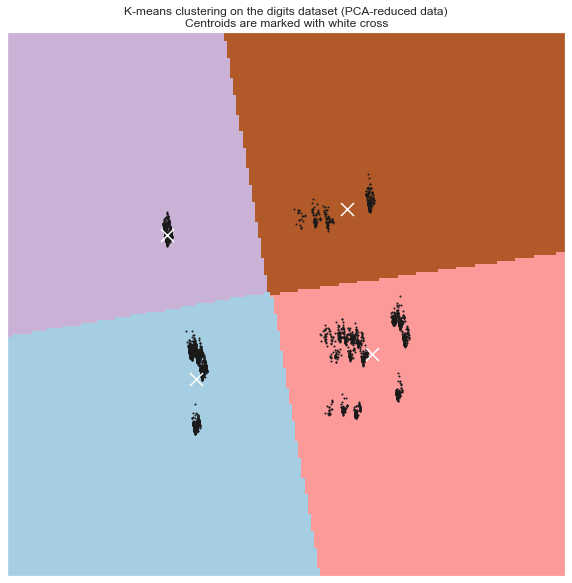

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201801)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201801[:, 0].min() - 1, reduced_data_201801[:, 0].max() + 1
y_min, y_max = reduced_data_201801[:, 1].min() - 1, reduced_data_201801[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201801[:, 0], reduced_data_201801[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Fevrier

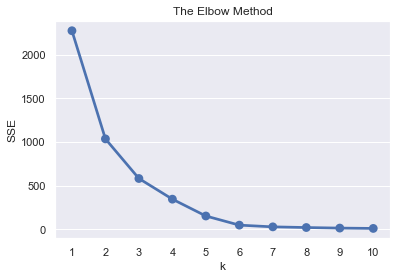

In [28]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_201802)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [29]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_201802)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201802_k3 = XCustomer_201802.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201802_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


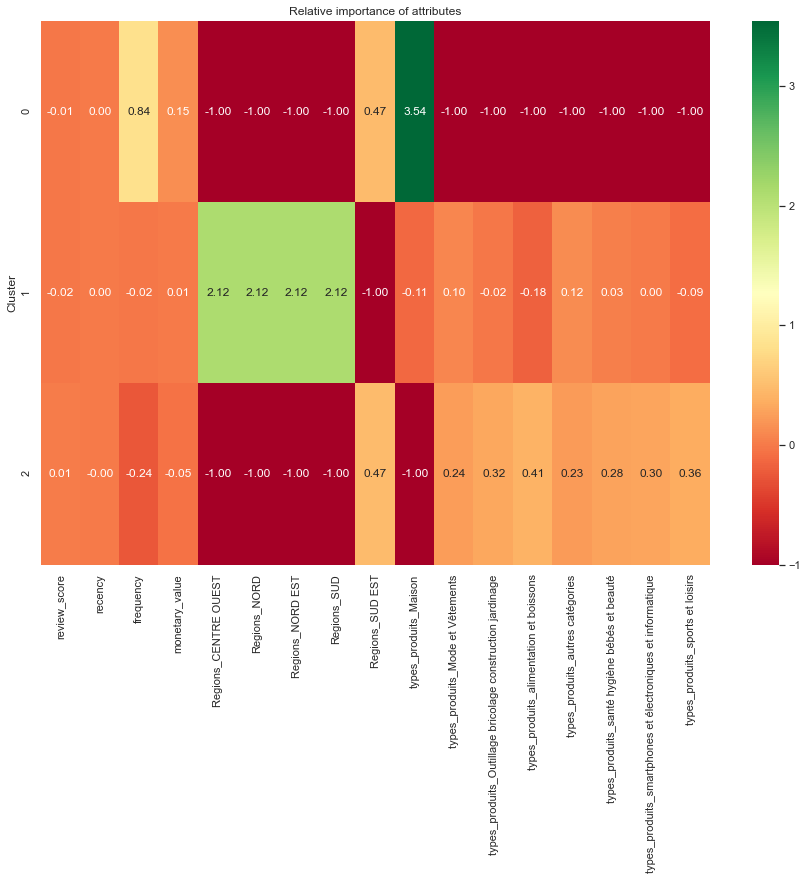

In [30]:
# Calculate average data values for each cluster
cluster_avg = data_process_201802_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201802.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


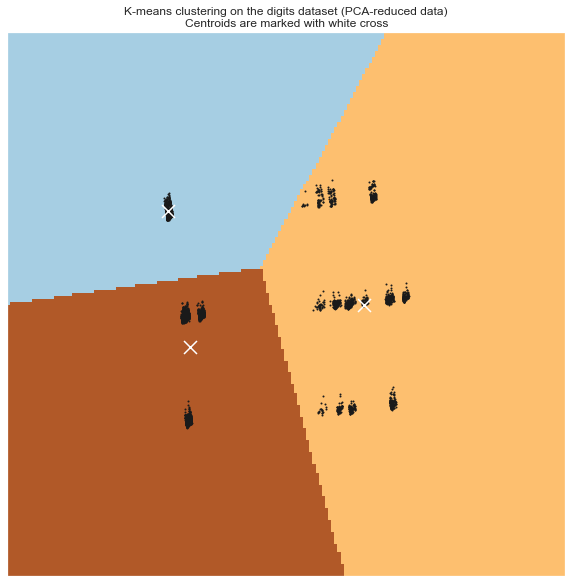

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201802)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201802[:, 0].min() - 1, reduced_data_201802[:, 0].max() + 1
y_min, y_max = reduced_data_201802[:, 1].min() - 1, reduced_data_201802[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201802[:, 0], reduced_data_201802[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [32]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_201802)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201802_k4 = XCustomer_201802.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201802_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


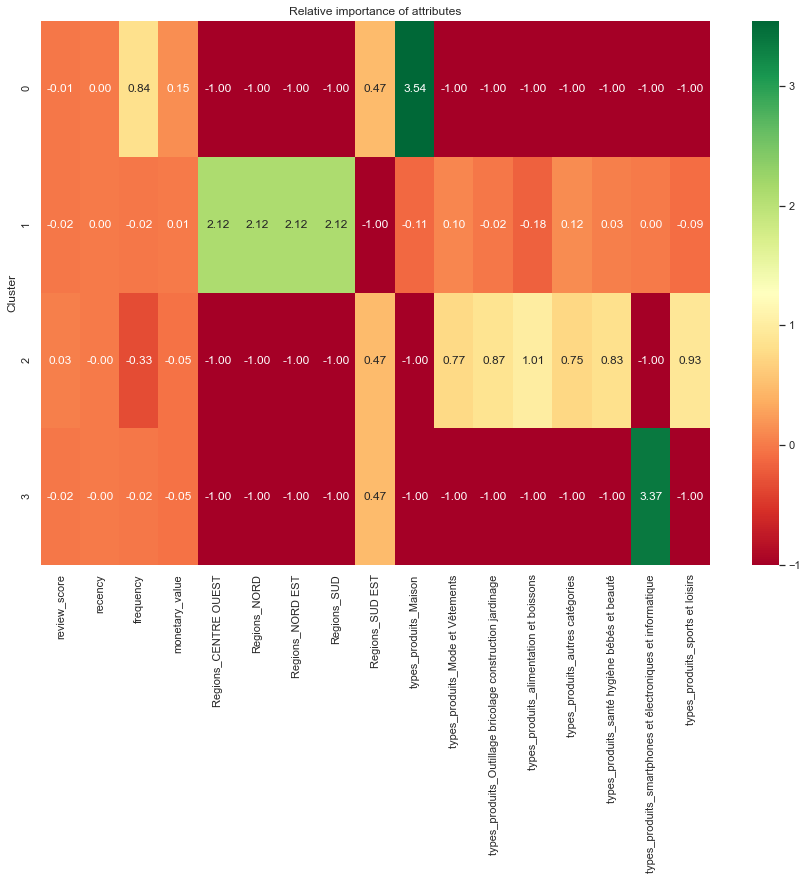

In [33]:
# Calculate average data values for each cluster
cluster_avg = data_process_201802_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201802.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


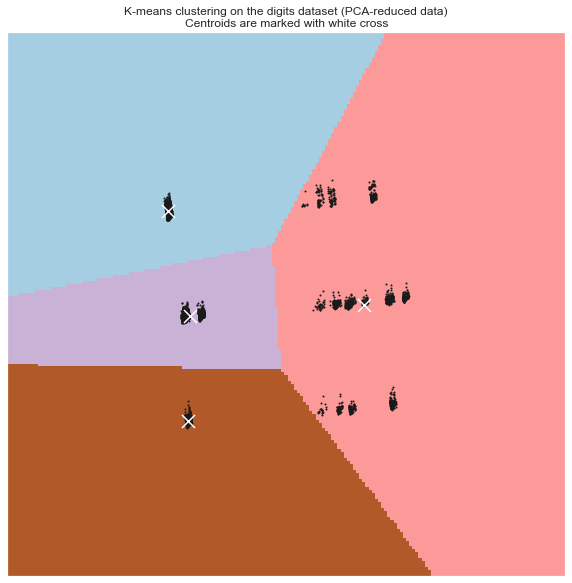

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201802)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201802[:, 0].min() - 1, reduced_data_201802[:, 0].max() + 1
y_min, y_max = reduced_data_201802[:, 1].min() - 1, reduced_data_201802[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201802[:, 0], reduced_data_201802[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Mars

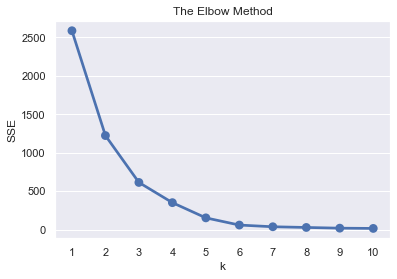

In [35]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_201803)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [36]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_201803)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201803_k3 = XCustomer_201803.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201803_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


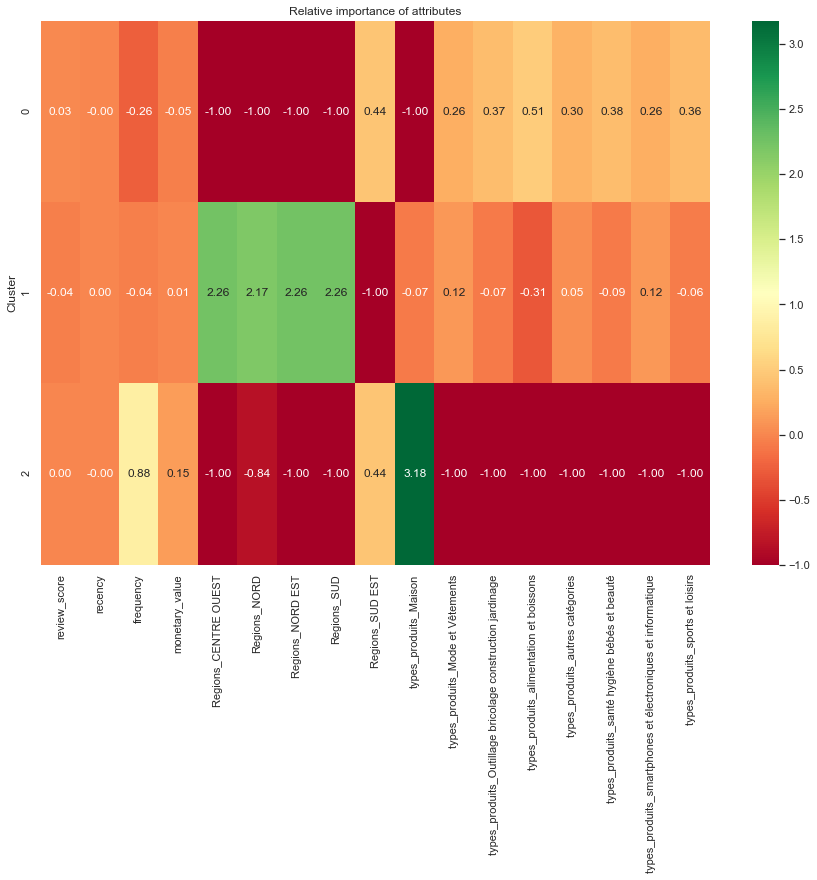

In [37]:
# Calculate average data values for each cluster
cluster_avg = data_process_201803_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201803.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


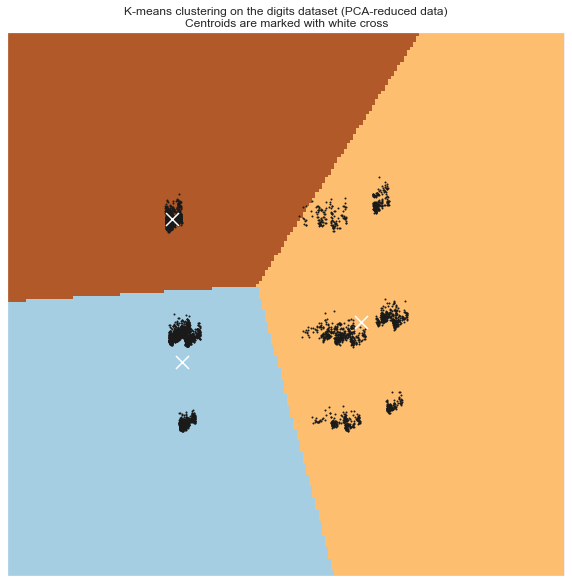

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201803)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201803[:, 0].min() - 1, reduced_data_201803[:, 0].max() + 1
y_min, y_max = reduced_data_201803[:, 1].min() - 1, reduced_data_201803[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201803[:, 0], reduced_data_201803[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [39]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_201803)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201803_k4 = XCustomer_201803.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201803_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,2.0,6.0,0.0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


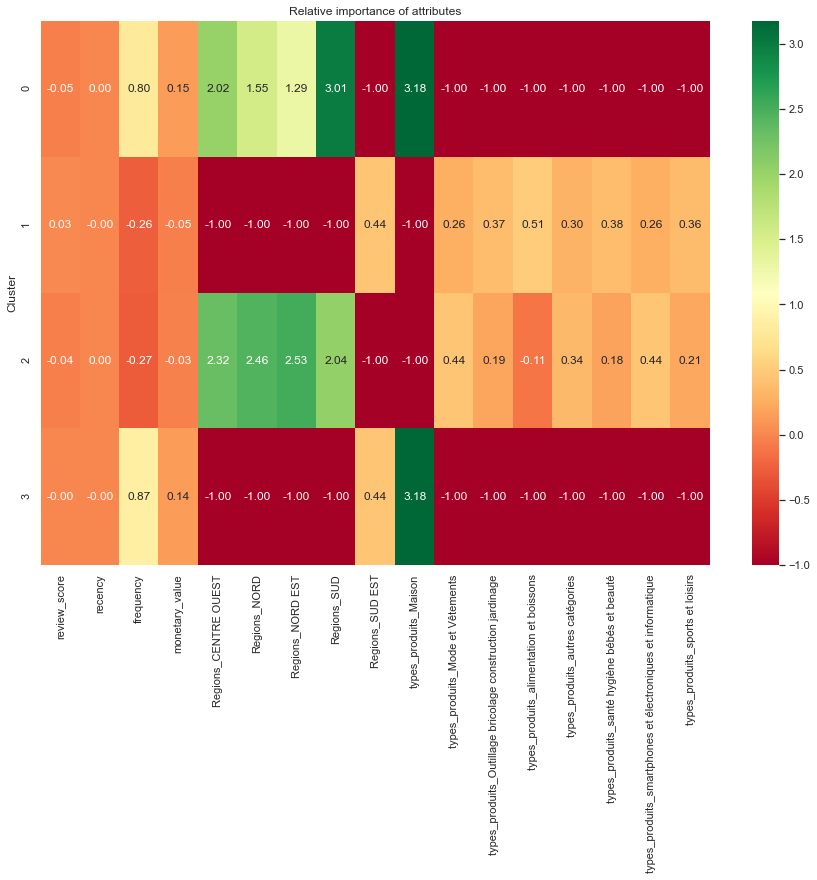

In [40]:
# Calculate average data values for each cluster
cluster_avg = data_process_201803_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201803.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


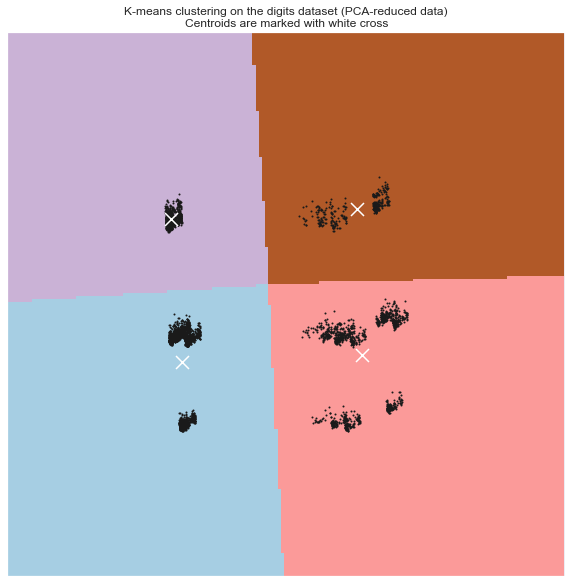

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201803)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201803[:, 0].min() - 1, reduced_data_201803[:, 0].max() + 1
y_min, y_max = reduced_data_201803[:, 1].min() - 1, reduced_data_201803[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201803[:, 0], reduced_data_201803[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Avril

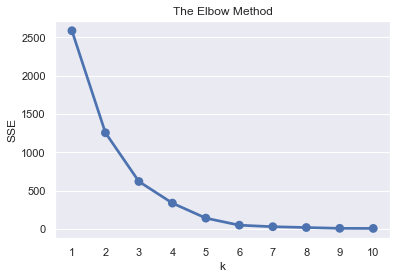

In [42]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_201804)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [43]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_201804)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201804_k3 = XCustomer_201804.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201804_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


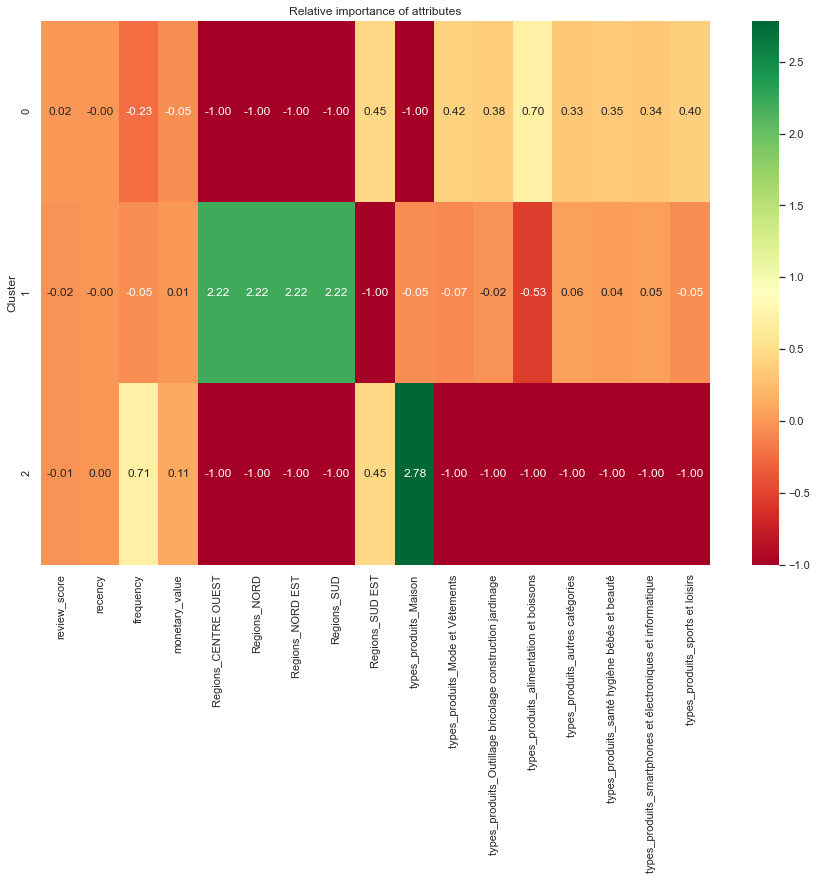

In [44]:
# Calculate average data values for each cluster
cluster_avg = data_process_201804_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201804.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


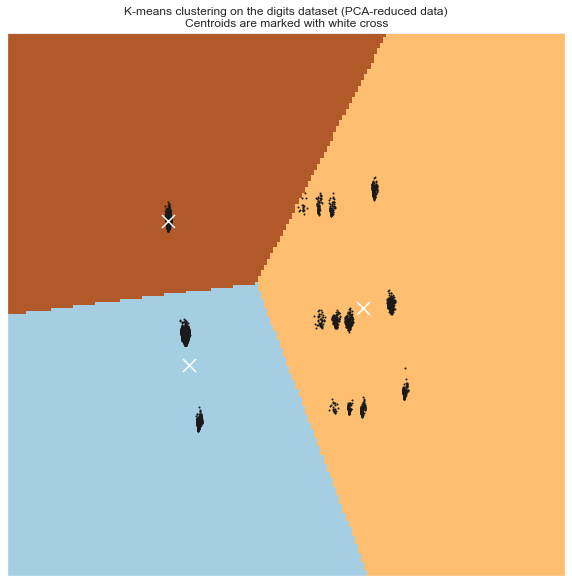

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201804)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201804[:, 0].min() - 1, reduced_data_201804[:, 0].max() + 1
y_min, y_max = reduced_data_201804[:, 1].min() - 1, reduced_data_201804[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201804[:, 0], reduced_data_201804[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [46]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_201804)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201804_k4 = XCustomer_201804.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201804_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,6.0,0.0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


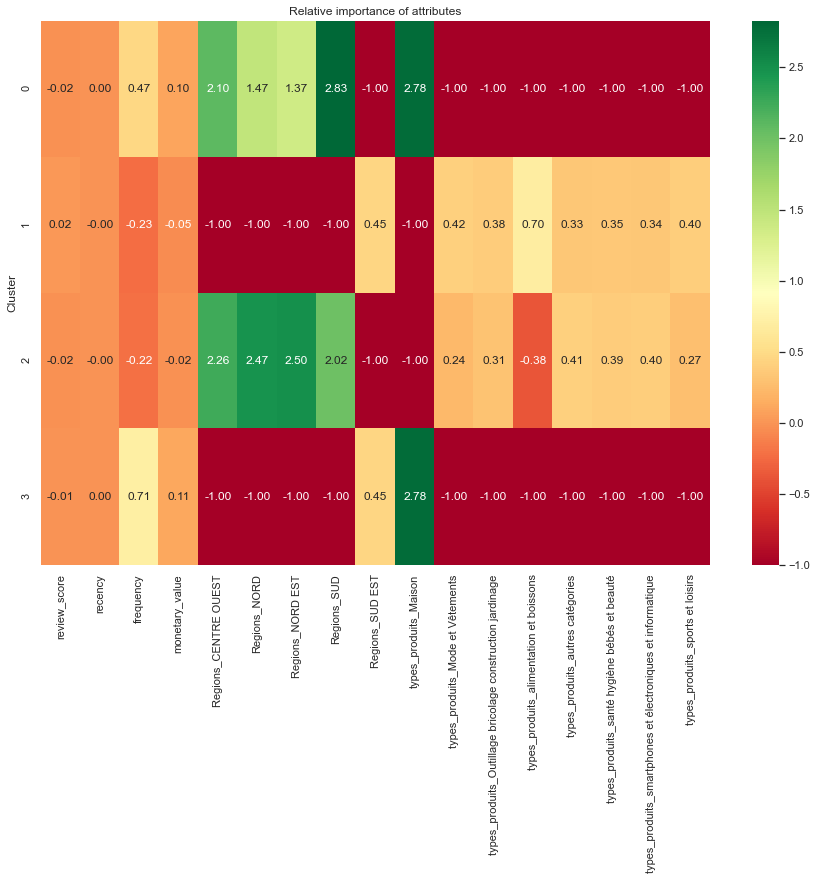

In [47]:
# Calculate average data values for each cluster
cluster_avg = data_process_201804_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201804.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


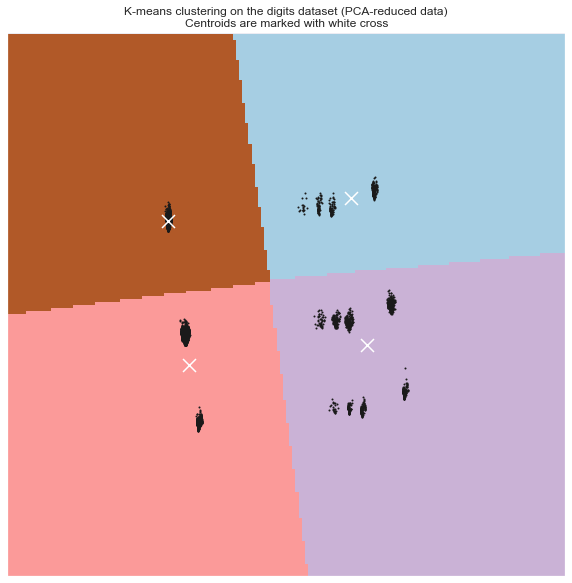

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201804)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201804[:, 0].min() - 1, reduced_data_201804[:, 0].max() + 1
y_min, y_max = reduced_data_201804[:, 1].min() - 1, reduced_data_201804[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201804[:, 0], reduced_data_201804[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Mai

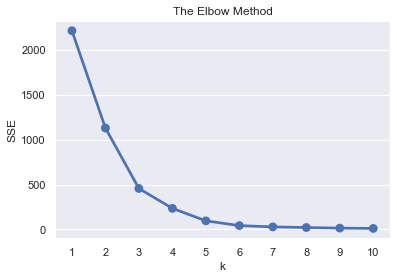

In [49]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_201805)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [50]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_201805)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201805_k3 = XCustomer_201805.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201805_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


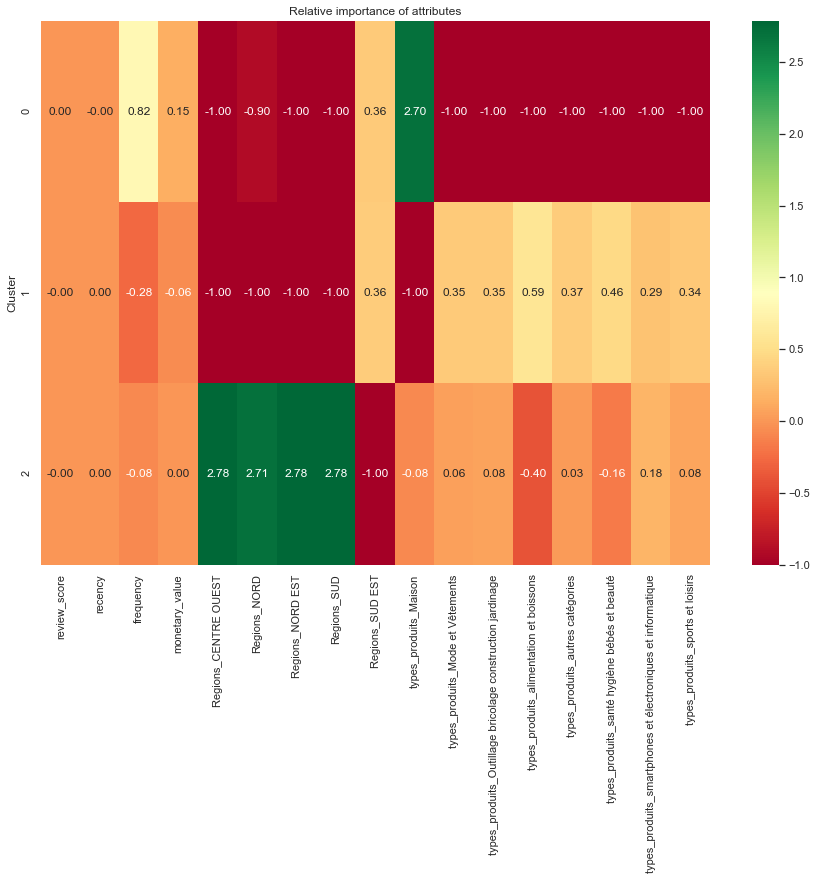

In [51]:
# Calculate average data values for each cluster
cluster_avg = data_process_201805_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201805.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


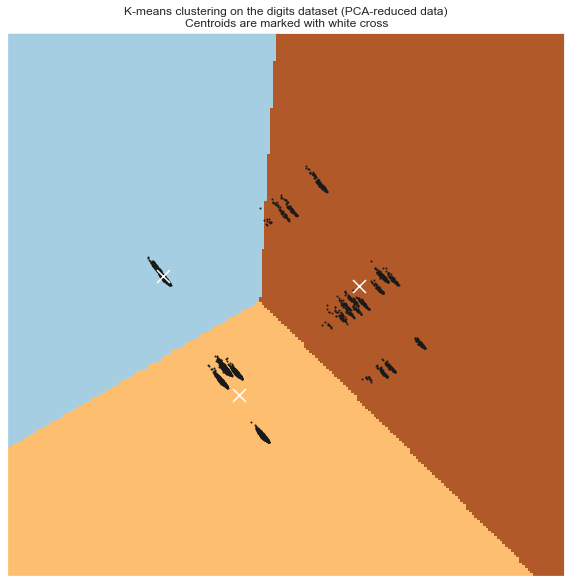

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201805)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201805[:, 0].min() - 1, reduced_data_201805[:, 0].max() + 1
y_min, y_max = reduced_data_201805[:, 1].min() - 1, reduced_data_201805[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201805[:, 0], reduced_data_201805[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [53]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_201805)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201805_k4 = XCustomer_201805.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201805_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,1.0,6.0,0.0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


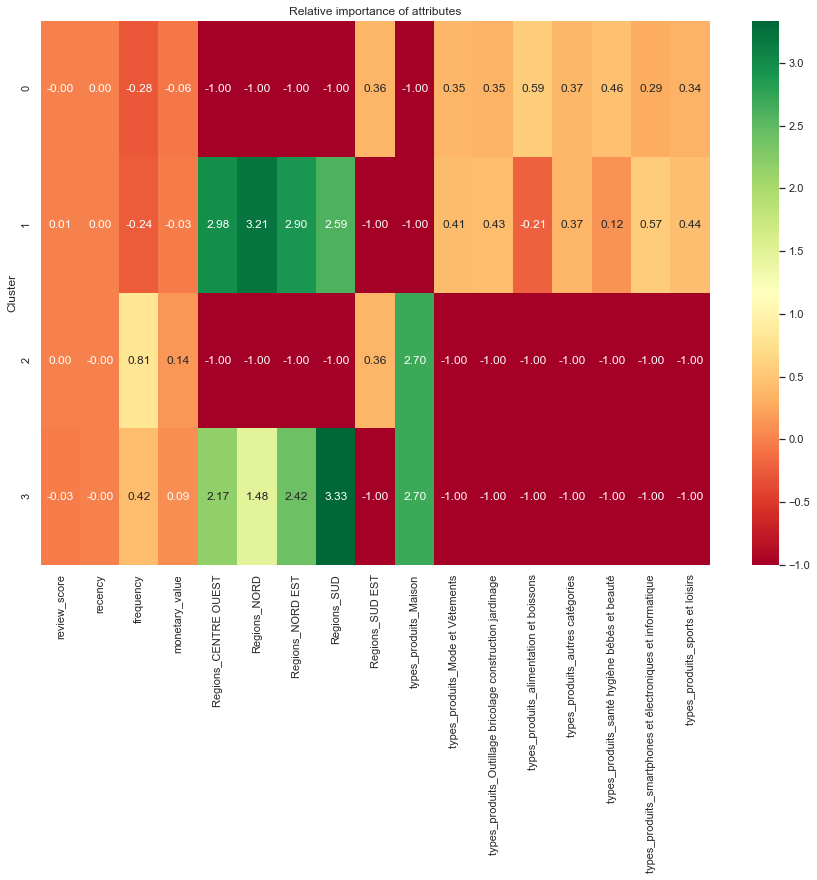

In [54]:
# Calculate average data values for each cluster
cluster_avg = data_process_201805_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201805.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


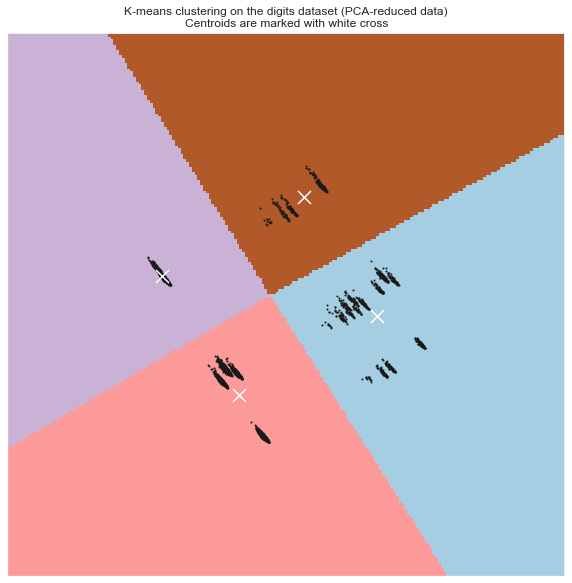

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201805)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201805[:, 0].min() - 1, reduced_data_201805[:, 0].max() + 1
y_min, y_max = reduced_data_201805[:, 1].min() - 1, reduced_data_201805[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201805[:, 0], reduced_data_201805[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Juin

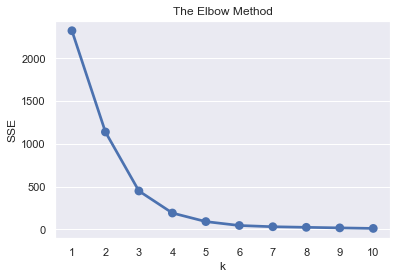

In [56]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_201806)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [57]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_201806)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201806_k3 = XCustomer_201806.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201806_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


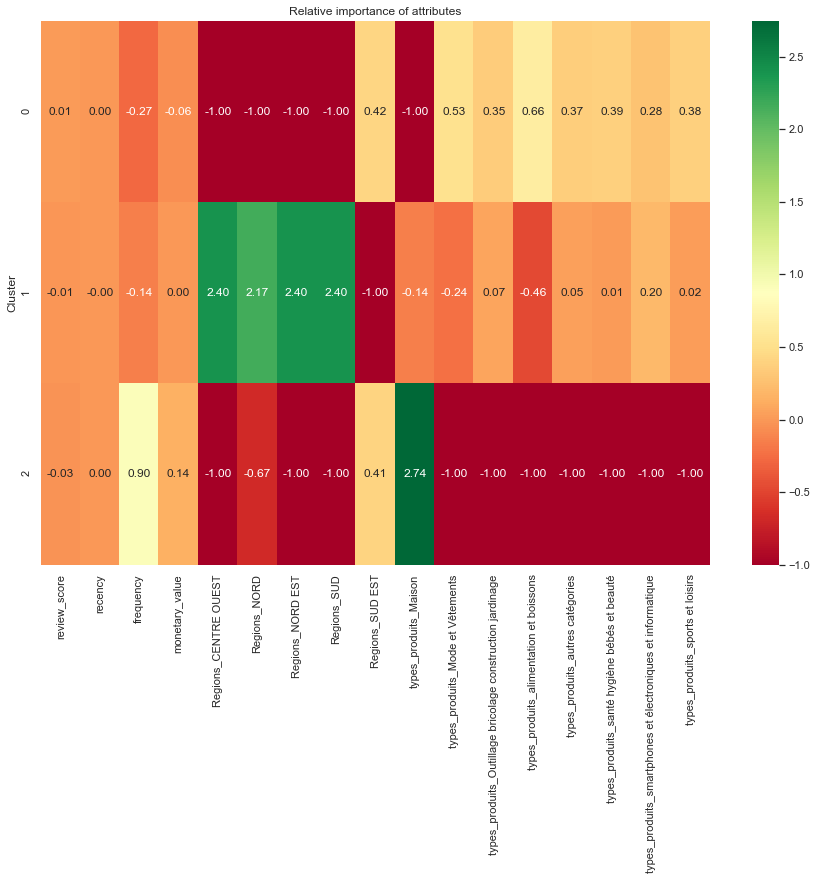

In [58]:
# Calculate average data values for each cluster
cluster_avg = data_process_201806_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201806.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


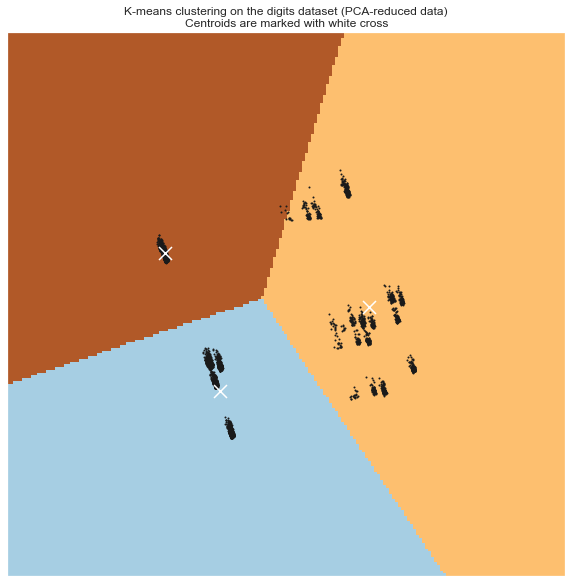

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201806)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201806[:, 0].min() - 1, reduced_data_201806[:, 0].max() + 1
y_min, y_max = reduced_data_201806[:, 1].min() - 1, reduced_data_201806[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201806[:, 0], reduced_data_201806[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [60]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_201806)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201806_k4 = XCustomer_201806.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201806_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,1.0,6.0,0.0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


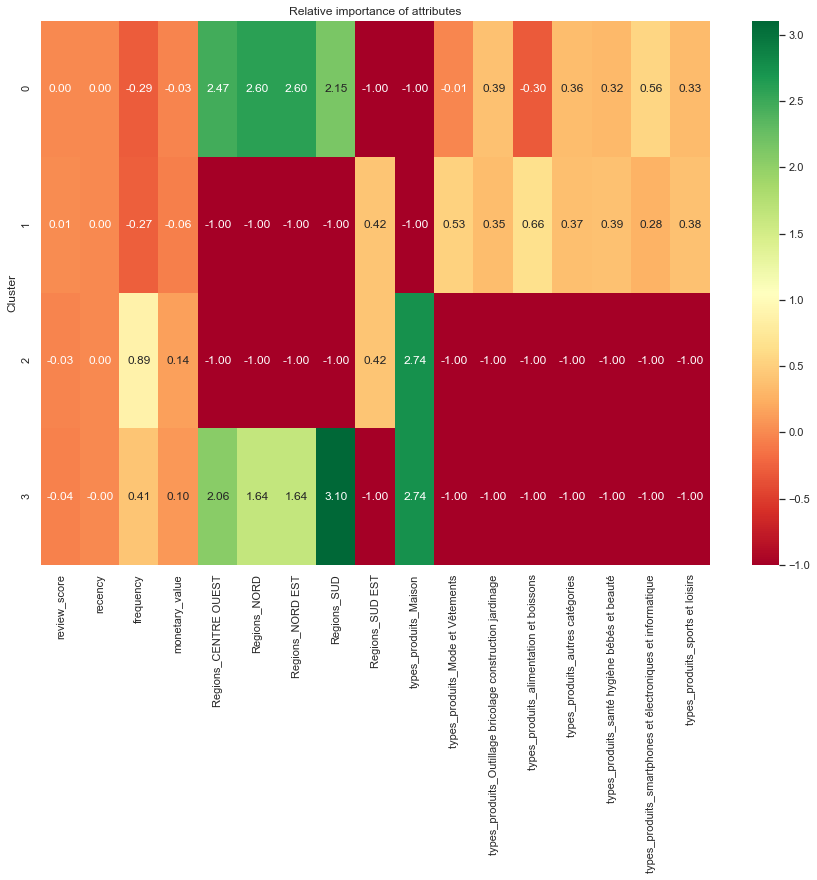

In [61]:
# Calculate average data values for each cluster
cluster_avg = data_process_201806_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201806.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


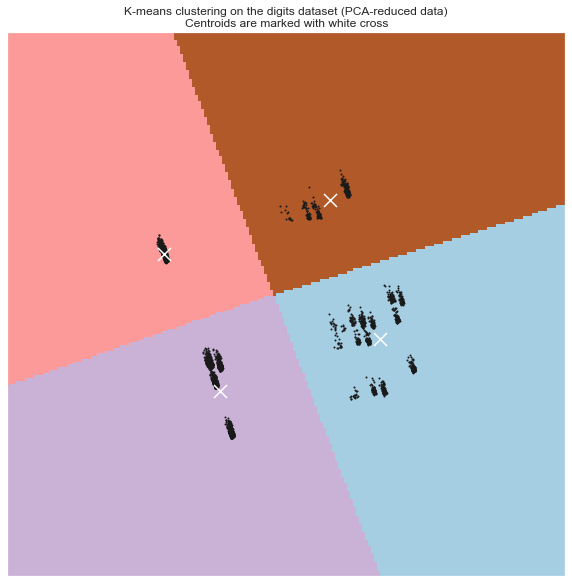

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201806)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201806[:, 0].min() - 1, reduced_data_201806[:, 0].max() + 1
y_min, y_max = reduced_data_201806[:, 1].min() - 1, reduced_data_201806[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201806[:, 0], reduced_data_201806[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Juillet

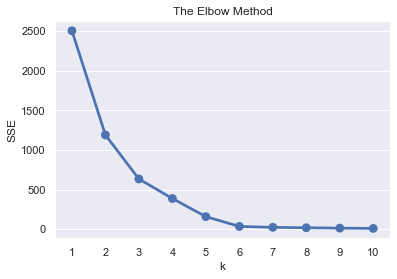

In [63]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_201807)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [64]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_201807)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201807_k3 = XCustomer_201807.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201807_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


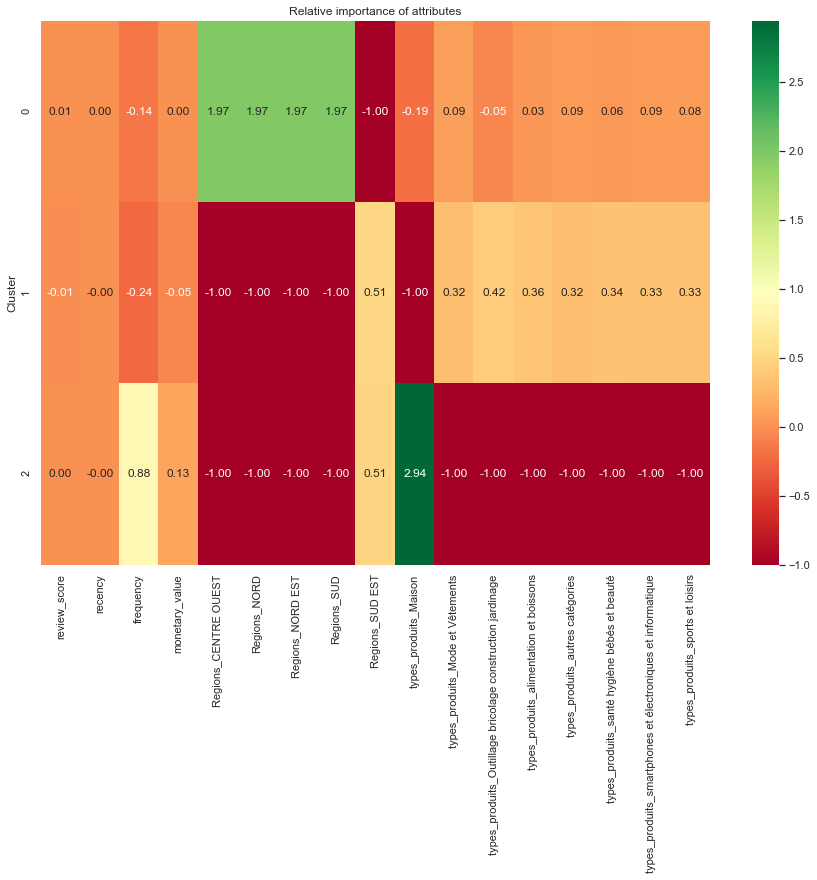

In [65]:
# Calculate average data values for each cluster
cluster_avg = data_process_201807_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201807.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


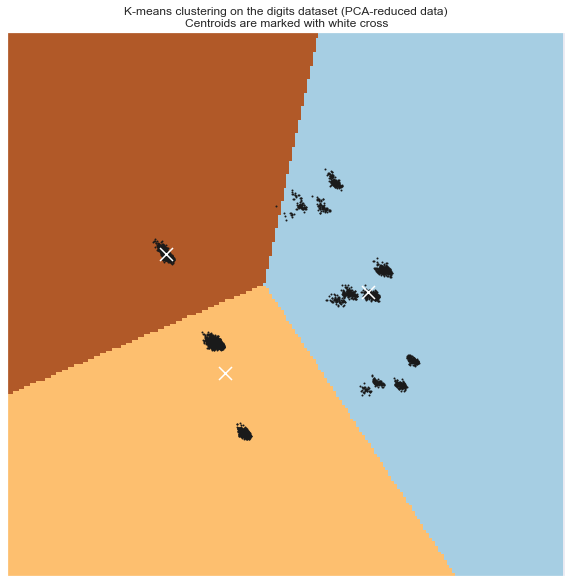

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201807)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201807[:, 0].min() - 1, reduced_data_201807[:, 0].max() + 1
y_min, y_max = reduced_data_201807[:, 1].min() - 1, reduced_data_201807[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201807[:, 0], reduced_data_201807[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [67]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_201807)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201807_k4 = XCustomer_201807.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201807_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


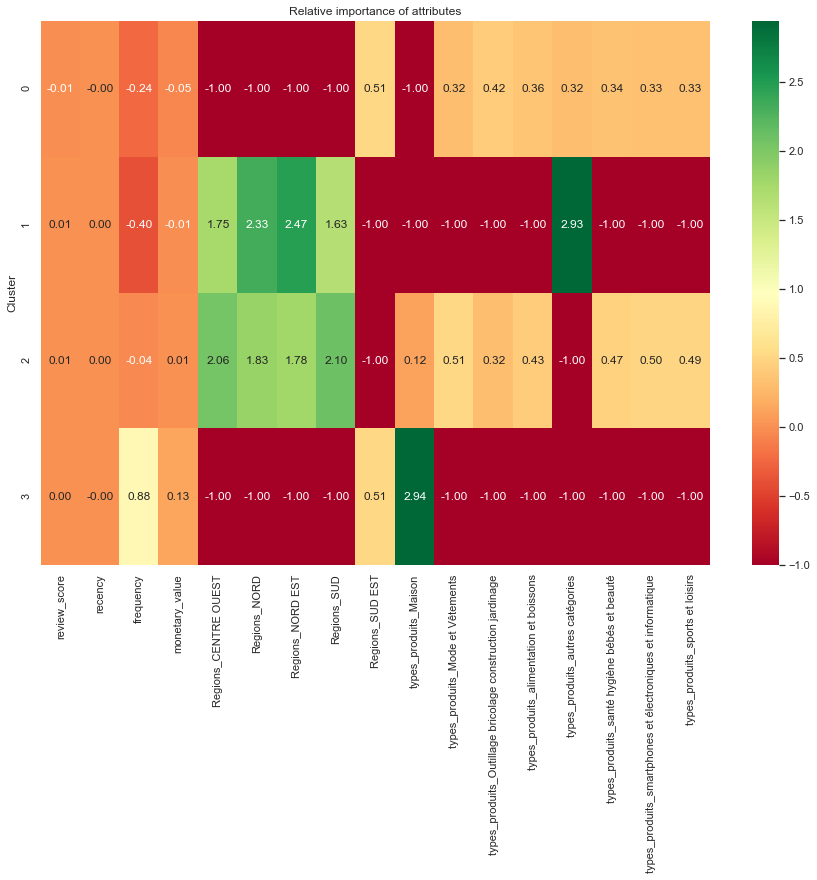

In [68]:
# Calculate average data values for each cluster
cluster_avg = data_process_201807_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201807.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


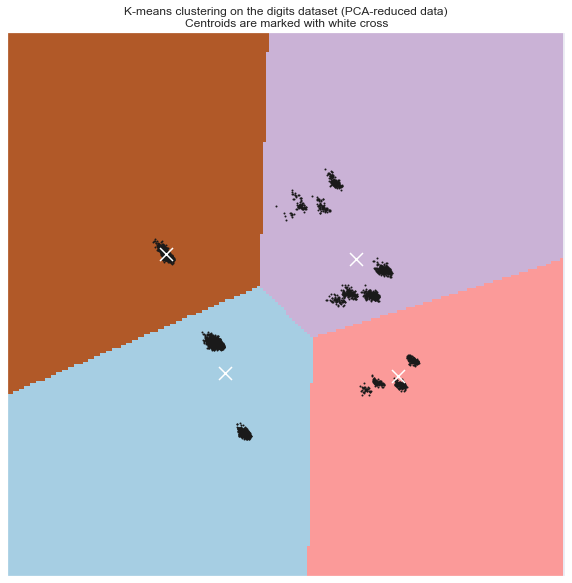

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201807)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201807[:, 0].min() - 1, reduced_data_201807[:, 0].max() + 1
y_min, y_max = reduced_data_201807[:, 1].min() - 1, reduced_data_201807[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201807[:, 0], reduced_data_201807[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Août

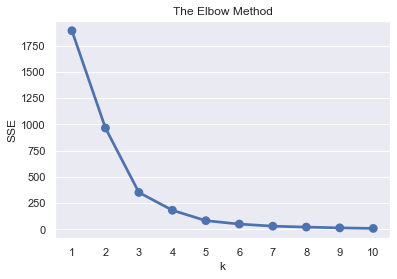

In [70]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(reduced_data_201808)
    sse[k] = kmeans.inertia_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [71]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(reduced_data_201808)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201808_k3 = XCustomer_201808.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201808_k3.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


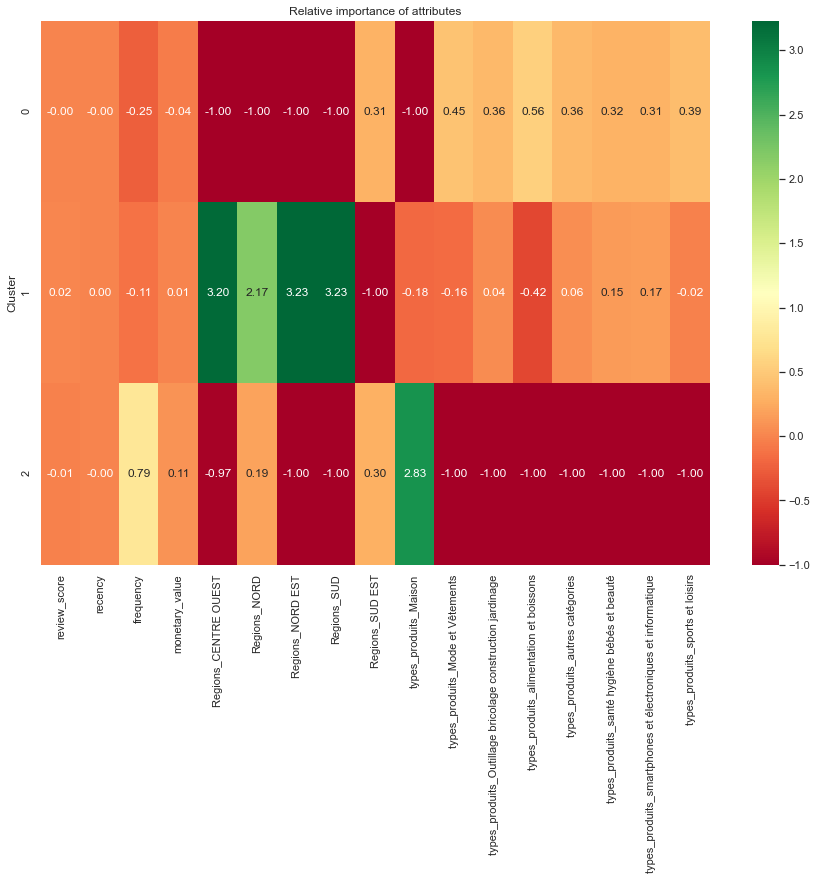

In [72]:
# Calculate average data values for each cluster
cluster_avg = data_process_201808_k3.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201808.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


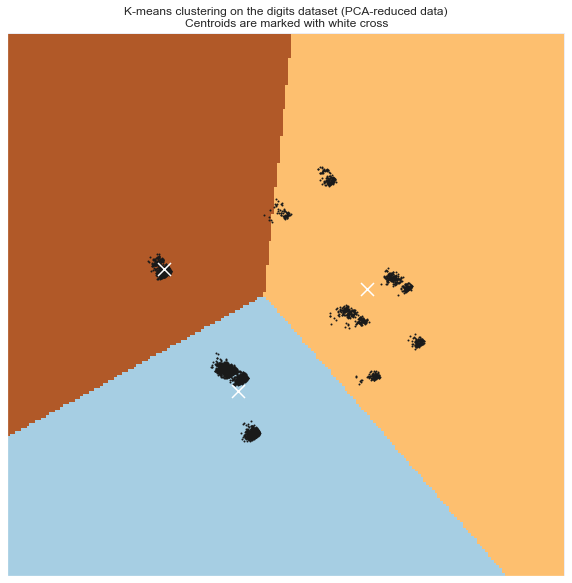

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201808)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201808[:, 0].min() - 1, reduced_data_201808[:, 0].max() + 1
y_min, y_max = reduced_data_201808[:, 1].min() - 1, reduced_data_201808[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201808[:, 0], reduced_data_201808[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [74]:
# Import KMeans from skLearn
from sklearn.cluster import KMeans
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(reduced_data_201808)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_201808_k4 = XCustomer_201808.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_201808_k4.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0)

,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,1.0,5.0,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,1.0,6.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,1.0,6.0,0.0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


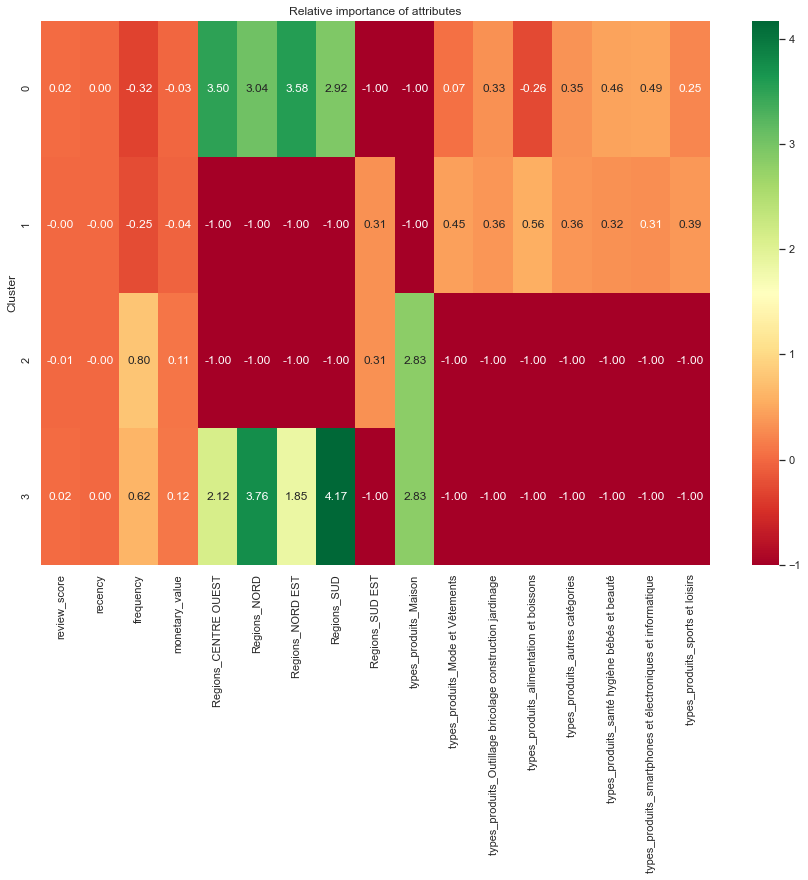

In [75]:
# Calculate average data values for each cluster
cluster_avg = data_process_201808_k4.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201808.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


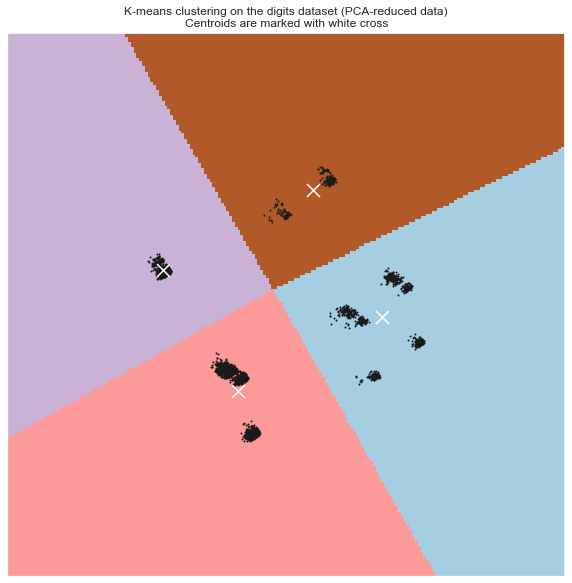

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#reduced_data = PCA(n_components=2).fit_transform(XCustomer_norm)
#kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data_201808)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data_201808[:, 0].min() - 1, reduced_data_201808[:, 0].max() + 1
y_min, y_max = reduced_data_201808[:, 1].min() - 1, reduced_data_201808[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
#plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data_201808[:, 0], reduced_data_201808[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# MODEL DBSCAN

## Année 2018

## Janvier

In [77]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
  
# Load data in X 
db = DBSCAN(eps=0.3, min_samples=10).fit(reduced_data_201801) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
cluster_labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0) 
 
print(cluster_labels) 

# Assign cluster labels to original pre-transformed data set
data_process_201801_ds = XCustomer_201801.assign(Cluster = cluster_labels)
# Group data set by DBSCAN cluster
data_process_201801_ds.groupby(['Cluster']).agg({
    'review_score': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'Regions_CENTRE OUEST': 'mean',
    'Regions_NORD': 'mean',
    'Regions_NORD EST': 'mean',
    'Regions_SUD': 'mean',    
    'Regions_SUD EST': 'mean',
    'types_produits_Maison': 'mean',    
    'types_produits_Mode et Vêtements': 'mean',
    'types_produits_Outillage bricolage construction jardinage': 'mean',    
    'types_produits_alimentation et boissons': 'mean',    
    'types_produits_autres catégories': 'mean',
    'types_produits_santé hygiène bébés et beauté': 'mean',    
    'types_produits_smartphones et électroniques et informatique': 'mean',
    'types_produits_sports et loisirs': 'mean'
}).round(0) 

[0 1 0 ... 0 3 1]


,review_score,recency,frequency,monetary_value,Regions_CENTRE OUEST,Regions_NORD,Regions_NORD EST,Regions_SUD,Regions_SUD EST,types_produits_Maison,types_produits_Mode et Vêtements,types_produits_Outillage bricolage construction jardinage,types_produits_alimentation et boissons,types_produits_autres catégories,types_produits_santé hygiène bébés et beauté,types_produits_smartphones et électroniques et informatique,types_produits_sports et loisirs
Cluster,,,,,,,,,,,,,,,,,
0,4.0,7.0,2.0,6.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,7.0,2.0,6.0,0.0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


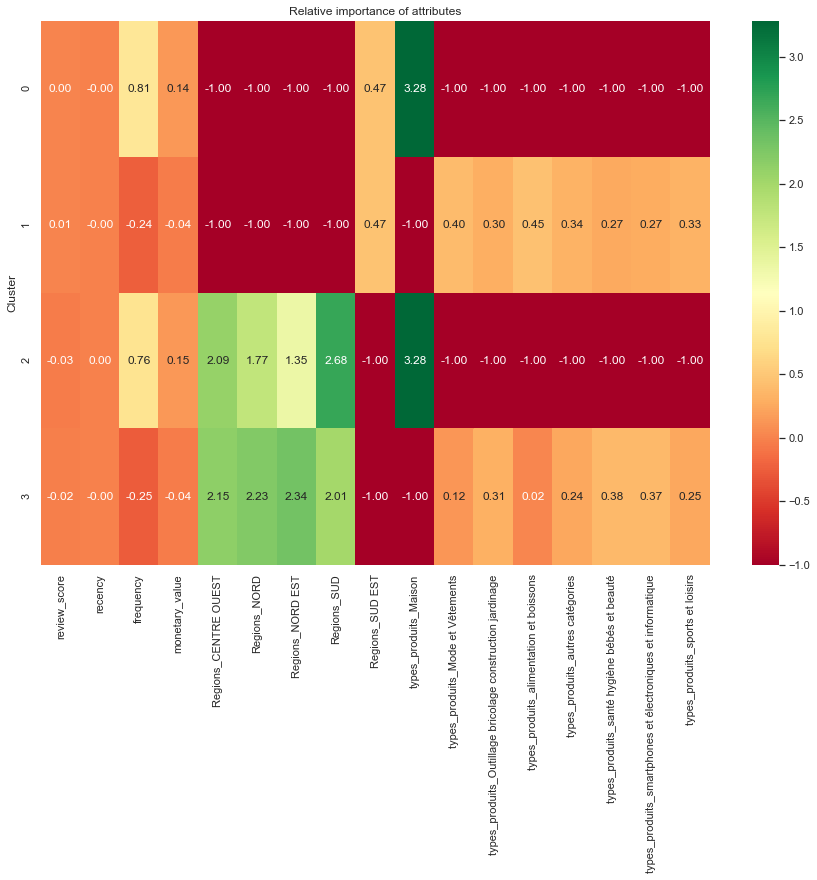

In [78]:
# Calculate average data values for each cluster
cluster_avg = data_process_201801_ds.groupby(['Cluster']).mean()
# Calculate average data values for the total customer population
population_avg = XCustomer_201801.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(15, 10))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

[0 1 0 ... 0 3 1]
['y', 'b', 'g', 'r']


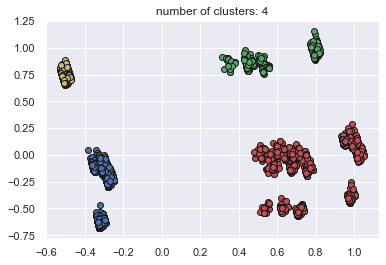

In [79]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
  
# Load data in X 
db = DBSCAN(eps=0.3, min_samples=10).fit(reduced_data_201801) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(labels) 
  
# Plot result 
import matplotlib.pyplot as plt 
  
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r']
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = reduced_data_201801[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = reduced_data_201801[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

# COMPARE MODELS KMeans vs DBSCAN

## Année 2018

## Janvier

In [80]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
scaled_features_201801 = reduced_data_201801

In [82]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [83]:
kmeans.fit(scaled_features_201801)

KMeans(init='random', n_clusters=4, random_state=42)

In [84]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_201801)
    sse.append(kmeans.inertia_)

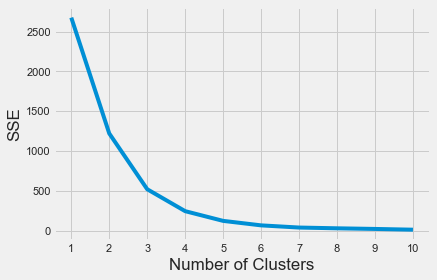

In [85]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()


In [86]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [87]:
kl.elbow

3

In [88]:
#A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_201801)
    score = silhouette_score(scaled_features_201801, kmeans.labels_)
    silhouette_coefficients.append(score)

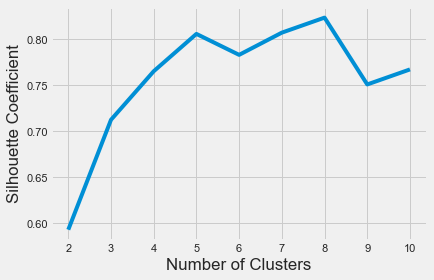

In [89]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [90]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [91]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features_201801)
dbscan.fit(scaled_features_201801)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features_201801, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features_201801, dbscan.labels_
).round (2)

In [92]:
kmeans_silhouette

0.71

In [93]:
dbscan_silhouette

0.77

In [94]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features_201801)
dbscan.fit(scaled_features_201801)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features_201801, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features_201801, dbscan.labels_
).round (2)

In [95]:
kmeans_silhouette

0.77

In [96]:
dbscan_silhouette

0.77

In [97]:
X201801 = scaled_features_201801

In [98]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X201801)
y_kmeans_201801 = kmeans.predict(X201801)

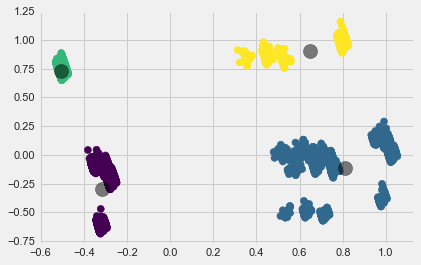

In [99]:
plt.scatter(X201801[:, 0], X201801[:, 1], c=y_kmeans_201801, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Février

In [100]:
scaled_features_201802 = reduced_data_201802

In [101]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [102]:
kmeans.fit(scaled_features_201802)

KMeans(init='random', n_clusters=4, random_state=42)

In [103]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_201802)
    sse.append(kmeans.inertia_)

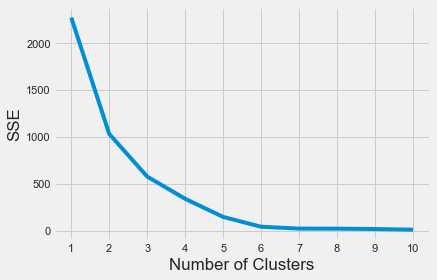

In [104]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()


In [105]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [106]:
kl.elbow

3

In [107]:
#A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_201802)
    score = silhouette_score(scaled_features_201802, kmeans.labels_)
    silhouette_coefficients.append(score)

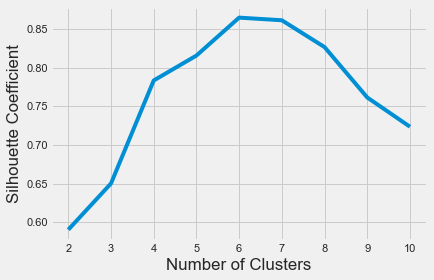

In [108]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [109]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [110]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features_201802)
dbscan.fit(scaled_features_201802)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features_201802, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features_201802, dbscan.labels_
).round (2)

In [111]:
kmeans_silhouette

0.78

In [112]:
dbscan_silhouette

0.86

In [113]:
X201802 = scaled_features_201802

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X201802)
y_kmeans_201802 = kmeans.predict(X201802)

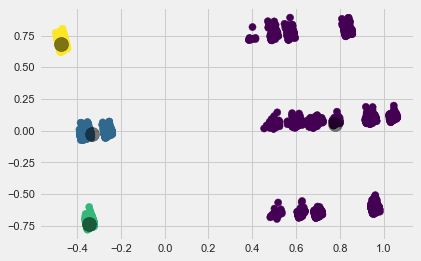

In [115]:
plt.scatter(X201802[:, 0], X201802[:, 1], c=y_kmeans_201802, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Recopie des données pour les mois suivant pour la Stabilité du modèle choisis "Kmeans"

In [116]:
X201803 = reduced_data_201803
X201804 = reduced_data_201804
X201805 = reduced_data_201805
X201806 = reduced_data_201806
X201807 = reduced_data_201807
X201808 = reduced_data_201808


## Stabilité du modèle kmean 

## Année 2018

## Janvier

In [117]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201801)
labels201801 = kmeans.labels_

In [118]:
pred201801 = kmeans.predict(X201801)

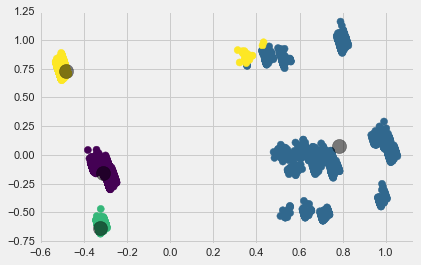

In [119]:
plt.scatter(X201801[:, 0], X201801[:, 1], c=pred201801, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [120]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred201801, labels201801))
print("Completeness: %0.3f" % metrics.completeness_score(pred201801, labels201801))
print("V-measure: %0.3f" % metrics.v_measure_score(pred201801, labels201801))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred201801, labels201801))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred201801, labels201801))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201801, labels201801))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.746


In [121]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201801)
labels = kmeans.labels_

In [122]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201801)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [123]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201801, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.765


In [124]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X201801)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6846953481783459

In [125]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201801, kmeans.labels_))

Homogeneity: 0.758
Completeness: 0.855
V-measure: 0.804
Adjusted Rand Index: 0.685
Adjusted Mutual Information: 0.803
Silhouette Coefficient: 0.765


In [126]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X201801)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [127]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201801, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.765


In [128]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201801)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [129]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201801, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.765


In [130]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201801)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [131]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201801, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.765


In [132]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201801)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [133]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201801, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.765


## Février

In [134]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201802)
labels201802 = kmeans.labels_

In [135]:
pred201802 = kmeans.predict(X201802)

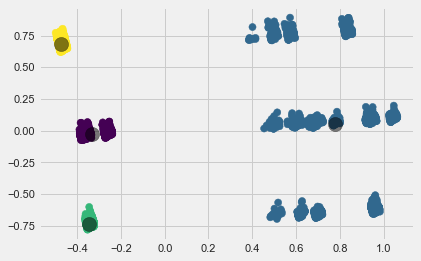

In [136]:
plt.scatter(X201802[:, 0], X201802[:, 1], c=pred201802, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [137]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred201802, labels201802))
print("Completeness: %0.3f" % metrics.completeness_score(pred201802, labels201802))
print("V-measure: %0.3f" % metrics.v_measure_score(pred201802, labels201802))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred201802, labels201802))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred201802, labels201802))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201802, labels201802))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.783


In [138]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201802)
labels = kmeans.labels_

In [139]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201802)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.3976408133121835

In [140]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201802, kmeans.labels_))

Homogeneity: 0.602
Completeness: 0.594
V-measure: 0.598
Adjusted Rand Index: 0.398
Adjusted Mutual Information: 0.598
Silhouette Coefficient: 0.660


In [141]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X201802)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6598553133992581

In [142]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201802, kmeans.labels_))

Homogeneity: 0.758
Completeness: 0.852
V-measure: 0.802
Adjusted Rand Index: 0.660
Adjusted Mutual Information: 0.802
Silhouette Coefficient: 0.660


In [143]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X201802)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6598553133992581

In [144]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201802, kmeans.labels_))

Homogeneity: 0.758
Completeness: 0.852
V-measure: 0.802
Adjusted Rand Index: 0.660
Adjusted Mutual Information: 0.802
Silhouette Coefficient: 0.660


In [145]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201802)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6598553133992581

In [146]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201802, kmeans.labels_))

Homogeneity: 0.758
Completeness: 0.852
V-measure: 0.802
Adjusted Rand Index: 0.660
Adjusted Mutual Information: 0.802
Silhouette Coefficient: 0.660


In [147]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201802)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6598553133992581

In [148]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201802, kmeans.labels_))

Homogeneity: 0.758
Completeness: 0.852
V-measure: 0.802
Adjusted Rand Index: 0.660
Adjusted Mutual Information: 0.802
Silhouette Coefficient: 0.660


## Mars

In [149]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201803)
labels201803 = kmeans.labels_

In [150]:
pred201803 = kmeans.predict(X201803)

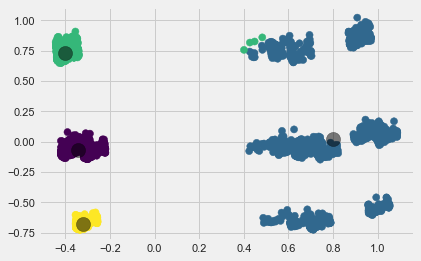

In [151]:
plt.scatter(X201803[:, 0], X201803[:, 1], c=pred201803, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [152]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred201803, labels201803))
print("Completeness: %0.3f" % metrics.completeness_score(pred201803, labels201803))
print("V-measure: %0.3f" % metrics.v_measure_score(pred201803, labels201803))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred201803, labels201803))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred201803, labels201803))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201803, labels201803))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.760


In [153]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201803)
labels = kmeans.labels_

In [154]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201803)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [155]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201803, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.709


In [156]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X201803)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.8982674579744083

In [157]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201803, kmeans.labels_))

Homogeneity: 0.874
Completeness: 0.879
V-measure: 0.876
Adjusted Rand Index: 0.898
Adjusted Mutual Information: 0.876
Silhouette Coefficient: 0.709


In [158]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X201803)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [159]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201803, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.709


In [160]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201803)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [161]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201803, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.709


In [162]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201803)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [163]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201803, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.709


In [164]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201803)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [165]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201803, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.709


## Avril

In [166]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201804)
labels201804 = kmeans.labels_

In [167]:
pred201804 = kmeans.predict(X201804)

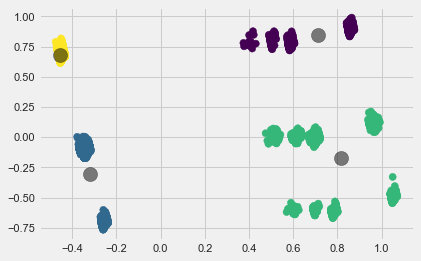

In [168]:
plt.scatter(X201804[:, 0], X201804[:, 1], c=pred201804, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [169]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred201804, labels201804))
print("Completeness: %0.3f" % metrics.completeness_score(pred201804, labels201804))
print("V-measure: %0.3f" % metrics.v_measure_score(pred201804, labels201804))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred201804, labels201804))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred201804, labels201804))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201804, labels201804))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.726


In [170]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201804)
labels = kmeans.labels_

In [171]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201804)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6579842519707357

In [172]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201804, kmeans.labels_))

Homogeneity: 0.854
Completeness: 0.763
V-measure: 0.806
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.806
Silhouette Coefficient: 0.787


In [173]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X201804)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [174]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201804, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.787


In [175]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X201804)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6579842519707357

In [176]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201804, kmeans.labels_))

Homogeneity: 0.854
Completeness: 0.763
V-measure: 0.806
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.806
Silhouette Coefficient: 0.787


In [177]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201804)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6579842519707357

In [178]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201804, kmeans.labels_))

Homogeneity: 0.854
Completeness: 0.763
V-measure: 0.806
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.806
Silhouette Coefficient: 0.787


In [179]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201804)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6579842519707357

In [180]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201804, kmeans.labels_))

Homogeneity: 0.854
Completeness: 0.763
V-measure: 0.806
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.806
Silhouette Coefficient: 0.787


In [181]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201804)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6579842519707357

In [182]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201804, kmeans.labels_))

Homogeneity: 0.854
Completeness: 0.763
V-measure: 0.806
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.806
Silhouette Coefficient: 0.787


## Mai

In [183]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201805)
labels201805 = kmeans.labels_

In [184]:
pred201805 = kmeans.predict(X201805)

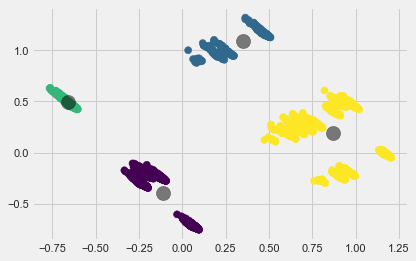

In [185]:
plt.scatter(X201805[:, 0], X201805[:, 1], c=pred201805, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [186]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred201805, labels201805))
print("Completeness: %0.3f" % metrics.completeness_score(pred201805, labels201805))
print("V-measure: %0.3f" % metrics.v_measure_score(pred201805, labels201805))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred201805, labels201805))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred201805, labels201805))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201805, labels201805))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.752


In [187]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201805)
labels = kmeans.labels_

In [188]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201805)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6583757810599143

In [189]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201805, kmeans.labels_))

Homogeneity: 0.870
Completeness: 0.749
V-measure: 0.805
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.805
Silhouette Coefficient: 0.774


In [190]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X201805)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [191]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201805, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.774


In [192]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X201805)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6583757810599143

In [193]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201805, kmeans.labels_))

Homogeneity: 0.870
Completeness: 0.749
V-measure: 0.805
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.805
Silhouette Coefficient: 0.774


In [194]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201805)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6583757810599143

In [195]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201805, kmeans.labels_))

Homogeneity: 0.870
Completeness: 0.749
V-measure: 0.805
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.805
Silhouette Coefficient: 0.774


In [196]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201805)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6583757810599143

In [197]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201805, kmeans.labels_))

Homogeneity: 0.870
Completeness: 0.749
V-measure: 0.805
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.805
Silhouette Coefficient: 0.774


In [198]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201805)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6583757810599143

In [199]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201805, kmeans.labels_))

Homogeneity: 0.870
Completeness: 0.749
V-measure: 0.805
Adjusted Rand Index: 0.658
Adjusted Mutual Information: 0.805
Silhouette Coefficient: 0.774


## Juin

In [200]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201806)
labels201806 = kmeans.labels_

In [201]:
pred201806 = kmeans.predict(X201806)

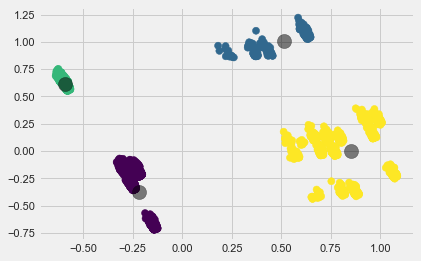

In [202]:
plt.scatter(X201806[:, 0], X201806[:, 1], c=pred201806, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [203]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred201806, labels201806))
print("Completeness: %0.3f" % metrics.completeness_score(pred201806, labels201806))
print("V-measure: %0.3f" % metrics.v_measure_score(pred201806, labels201806))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred201806, labels201806))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred201806, labels201806))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201806, labels201806))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.778


In [204]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201806)
labels = kmeans.labels_

In [205]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201806)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [206]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201806, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.778


In [207]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X201806)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [208]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201806, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.778


In [209]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X201806)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [210]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201806, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.778


In [211]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201806)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [212]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201806, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.778


In [213]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201806)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [214]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201806, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.778


In [215]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201806)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [216]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201806, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.778


## Juillet

In [217]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201807)
labels201807 = kmeans.labels_

In [218]:
pred201807 = kmeans.predict(X201807)

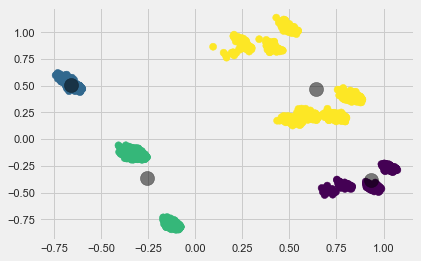

In [219]:
plt.scatter(X201807[:, 0], X201807[:, 1], c=pred201807, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [220]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred201807, labels201807))
print("Completeness: %0.3f" % metrics.completeness_score(pred201807, labels201807))
print("V-measure: %0.3f" % metrics.v_measure_score(pred201807, labels201807))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred201807, labels201807))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred201807, labels201807))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201807, labels201807))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.674


In [221]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201807)
labels = kmeans.labels_

In [222]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201807)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [223]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201807, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.782


In [224]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X201807)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6506605457944892

In [225]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201807, kmeans.labels_))

Homogeneity: 0.837
Completeness: 0.770
V-measure: 0.802
Adjusted Rand Index: 0.651
Adjusted Mutual Information: 0.802
Silhouette Coefficient: 0.782


In [226]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X201807)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [227]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201807, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.782


In [228]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201807)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6506605457944892

In [229]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201807, kmeans.labels_))

Homogeneity: 0.837
Completeness: 0.770
V-measure: 0.802
Adjusted Rand Index: 0.651
Adjusted Mutual Information: 0.802
Silhouette Coefficient: 0.782


In [230]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201807)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6506605457944892

In [231]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201807, kmeans.labels_))

Homogeneity: 0.837
Completeness: 0.770
V-measure: 0.802
Adjusted Rand Index: 0.651
Adjusted Mutual Information: 0.802
Silhouette Coefficient: 0.782


In [232]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201807)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6739545935376628

In [233]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201807, kmeans.labels_))

Homogeneity: 0.857
Completeness: 0.770
V-measure: 0.811
Adjusted Rand Index: 0.674
Adjusted Mutual Information: 0.811
Silhouette Coefficient: 0.782


## Août

In [234]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201808)
labels201808 = kmeans.labels_

In [235]:
pred201808 = kmeans.predict(X201808)

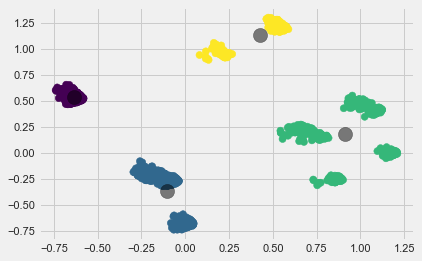

In [236]:
plt.scatter(X201808[:, 0], X201808[:, 1], c=pred201808, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [237]:
from sklearn import metrics

#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(pred201808, labels201808))
print("Completeness: %0.3f" % metrics.completeness_score(pred201808, labels201808))
print("V-measure: %0.3f" % metrics.v_measure_score(pred201808, labels201808))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(pred201808, labels201808))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(pred201808, labels201808))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201808, labels201808))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.773


In [238]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201808)
labels = kmeans.labels_

In [239]:
kmeans2 = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(X201808)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6660729937280437

In [240]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201808, kmeans.labels_))

Homogeneity: 0.882
Completeness: 0.740
V-measure: 0.804
Adjusted Rand Index: 0.666
Adjusted Mutual Information: 0.804
Silhouette Coefficient: 0.771


In [241]:
kmeans2 = KMeans(n_clusters=4, n_init=2, init='k-means++').fit(X201808)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

1.0

In [242]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201808, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.771


In [243]:
kmeans2 = KMeans(n_clusters=4, n_init=5, init='k-means++').fit(X201808)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6660729937280437

In [244]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201808, kmeans.labels_))

Homogeneity: 0.882
Completeness: 0.740
V-measure: 0.804
Adjusted Rand Index: 0.666
Adjusted Mutual Information: 0.804
Silhouette Coefficient: 0.771


In [245]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201808)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6660729937280437

In [246]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201808, kmeans.labels_))

Homogeneity: 0.882
Completeness: 0.740
V-measure: 0.804
Adjusted Rand Index: 0.666
Adjusted Mutual Information: 0.804
Silhouette Coefficient: 0.771


In [247]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201808)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6660729937280437

In [248]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201808, kmeans.labels_))

Homogeneity: 0.882
Completeness: 0.740
V-measure: 0.804
Adjusted Rand Index: 0.666
Adjusted Mutual Information: 0.804
Silhouette Coefficient: 0.771


In [249]:
kmeans2 = KMeans(n_clusters=4, n_init=10, init='k-means++').fit(X201808)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.6660729937280437

In [250]:
#print('Estimated number of clusters: %d' % n_clusters_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(kmeans2.labels_, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(kmeans2.labels_, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(kmeans2.labels_, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X201808, kmeans.labels_))

Homogeneity: 0.882
Completeness: 0.740
V-measure: 0.804
Adjusted Rand Index: 0.666
Adjusted Mutual Information: 0.804
Silhouette Coefficient: 0.771
